In [1]:
import numpy as np
import pandas as pd
import scanpy as sc 

adata = sc.read_h5ad("dataset_co_mo.h5ad")

In [2]:
np.random.seed(42) 

# Data prep
sc.pp.normalize_total(adata, target_sum=1e4) # You can adjust target_sum # Seems not to help
sc.pp.log1p(adata)

In [3]:
# Extract source and receiver genes efficiently
#gl_source = ['TGFBR2', 'SMAD3', 'HIF1A', 'PDGFB'] # All values from the first column
#gl_recv =['PDGFRB', 'FN1', 'TGFB1']  # All values from the second column

#gl_source = ['TGFBR2', 'HIF1A', 'PDGFB'] # All values from the first column
#gl_recv =['PDGFRB', 'FN1', 'TGFB1']  # All values from the second column

gl_source = ['TGFBR2', 'PDGFB'] # All values from the first column
gl_recv =['PDGFRB', 'TGFB1']  # All values from the second column

gl_source = ['TGFBR2', 'SMAD3', 'SNAI1', 'PDGFB'] # All values from the first column
gl_recv =['PDGFRB', 'COL1A1', 'ACTA2', 'TGFB1']  # All values from the second column


gl_source = ['TGFBR2', 'SMAD3', 'PDGFB'] # All values from the first column
gl_recv =['PDGFRB', 'COL1A1', 'TGFB1']  # All values from the second column


pi_mul = np.pi*2/4

In [4]:
ict1 = adata.obs["BatchID"] == "Cancer Cells (Co)"
ict2 = adata.obs["BatchID"] == "Fibroblasts (Co)" 

adata_ct1_co = adata[ict1, gl_source]
adata_ct2_co = adata[ict2, gl_recv]
#adata_ct1_co = sc.external.pp.magic(adata_ct1_co, name_list=gl_source, knn=5, random_state=42)
#adata_ct2_co = sc.external.pp.magic(adata_ct2_co, name_list=gl_recv, knn=5, random_state=42)

print(adata_ct1_co)
print(adata_ct2_co)

Xct1_co = adata_ct1_co.X.toarray()
Xct2_co = adata_ct2_co.X.toarray()
#Xct1_co = adata_ct1_co.X
#Xct2_co = adata_ct2_co.X

# Assuming Xct1_co and Xct2 are your log-transformed expression matrices
Xct1means = np.mean(Xct1_co, axis=0) *0
Xct2means = np.mean(Xct2_co, axis=0) *0
print("CT1 (Co) mean expression:", Xct1means)
print("CT2 (Co) mean expression:", Xct2means)

# Binarize Xct1
Xct1_binary_co = (Xct1_co > Xct1means).astype(int)
# Binarize Xct2
Xct2_binary_co = (Xct2_co > Xct2means).astype(int)

# Calculate the proportion of cells with expression above mean for each gene in ct1
Xct1p_co = np.sum(Xct1_binary_co, axis=0) / len(Xct1_binary_co[:, 0])
# Calculate the proportion of cells with expression above mean for each gene in ct2
Xct2p_co = np.sum(Xct2_binary_co, axis=0) / len(Xct2_binary_co[:, 0])

print("CT1 (Co) Percentages:", Xct1p_co)
print("CT2 (Co) Percentages:", Xct2p_co)

# Scale the data from 0 to 1 to -pi/2 to pi/2 | 2*pi or pi?
#ct1_percentages_co = (Xct1p_co -0.5) * pi_mul + np.pi
#ct2_percentages_co = (Xct2p_co -0.5) * pi_mul + np.pi
#ct1_percentages_co = Xct1p_co * pi_mul 
#ct2_percentages_co = Xct2p_co * pi_mul 
ct1_percentages_co = np.ones(len(Xct1p_co)) * pi_mul 
ct2_percentages_co = np.ones(len(Xct2p_co)) * pi_mul 

# Display the resulting scaled data
print("Scaled (Co) ct1_data:\n", ct1_percentages_co)
print("Scaled (Co) ct2_data:\n", ct2_percentages_co)

View of AnnData object with n_obs × n_vars = 1414 × 3
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
    uns: 'log1p'
View of AnnData object with n_obs × n_vars = 1324 × 3
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
    uns: 'log1p'
CT1 (Co) mean expression: [0. 0. 0.]
CT2 (Co) mean expression: [0. 0. 0.]
CT1 (Co) Percentages: [0.3748232  0.79915134 0.29915134]
CT2 (Co) Percentages: [0.41993958 0.96752266 0.51812689]
Scaled (Co) ct1_data:
 [1.57079633 1.57079633 1.57079633]
Scaled (Co) ct2_data:
 [1.57079633 1.57079633 1.57079633]


In [5]:
ict1 = adata.obs["BatchID"] == "Cancer Cells (Mo)"
ict2 = adata.obs["BatchID"] == "Fibroblasts (Mo)" 

adata_ct1_mo = adata[ict1, gl_source]
adata_ct2_mo = adata[ict2, gl_recv]
#adata_ct1_mo = sc.external.pp.magic(adata_ct1_mo, name_list=gl_source, knn=5, random_state=42)
#adata_ct2_mo = sc.external.pp.magic(adata_ct2_mo, name_list=gl_recv, knn=5, random_state=42)

print(adata_ct1_mo)
print(adata_ct2_mo)

# Library size normalization 
Xct1_mo = adata_ct1_mo.X.toarray()
Xct2_mo = adata_ct2_mo.X.toarray()
#Xct1_mo = adata_ct1_mo.X
#Xct2_mo = adata_ct2_mo.X

# Assuming Xct1_co and Xct2 are your log-transformed expression matrices
#Xct1means = np.mean(Xct1_mo, axis=0)
#Xct2means = np.mean(Xct2_mo, axis=0)
#print("CT1 (Co) mean expression:", Xct1means)
#print("CT2 (Co) mean expression:", Xct2means)

# Utilize the mono cultured means here
# Binarize Xct1
Xct1_binary_mo = (Xct1_mo > Xct1means).astype(int)
# Binarize Xct2
Xct2_binary_mo = (Xct2_mo > Xct2means).astype(int)

# Calculate the proportion of cells with expression above mean for each gene in ct1
Xct1p_mo = np.sum(Xct1_binary_mo, axis=0) / len(Xct1_binary_mo[:, 0])

# Calculate the proportion of cells with expression above mean for each gene in ct2
Xct2p_mo = np.sum(Xct2_binary_mo, axis=0) / len(Xct2_binary_mo[:, 0])

print("CT1 (Mo) Percentages:", Xct1p_mo)
print("CT2 (Mo) Percentages:", Xct2p_mo)

# Scale the data from 0 to 1 to -pi/2 to pi/2 | 2*pi or pi?
#ct1_percentages_mo = (Xct1p_mo -0.5) * pi_mul + np.pi/2
#ct2_percentages_mo = (Xct2p_mo -0.5) * pi_mul + np.pi/2
#ct1_percentages_mo = Xct1p_mo * pi_mul 
#ct2_percentages_mo = Xct2p_mo * pi_mul
ct1_percentages_mo = np.ones(len(Xct1p_mo)) * pi_mul 
ct2_percentages_mo = np.ones(len(Xct2p_mo)) * pi_mul 

# Display the resulting scaled data
print("Scaled (Mo) ct1_data:\n", ct1_percentages_mo)
print("Scaled (Mo) ct2_data:\n", ct2_percentages_mo)

View of AnnData object with n_obs × n_vars = 2364 × 3
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
    uns: 'log1p'
View of AnnData object with n_obs × n_vars = 2788 × 3
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
    uns: 'log1p'
CT1 (Mo) Percentages: [0.36759729 0.8071066  0.09898477]
CT2 (Mo) Percentages: [0.29196557 0.91248207 0.42969871]
Scaled (Mo) ct1_data:
 [1.57079633 1.57079633 1.57079633]
Scaled (Mo) ct2_data:
 [1.57079633 1.57079633 1.57079633]


In [6]:
print(adata_ct1_co.var_names)
print(adata_ct2_co.var_names)

Index(['TGFBR2', 'SMAD3', 'PDGFB'], dtype='object')
Index(['PDGFRB', 'COL1A1', 'TGFB1'], dtype='object')


In [7]:
import sys
import os

# Replace with your actual path
cc_grn_functions_path = r"C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions"
#cc_grn_functions_path = r"C:\Users\selim\Documents\vs_working_dir\QuantumXCT\python\cc_grn_functions"
sys.path.append(cc_grn_functions_path)

from histogram_functions import create_joint_histogram, plot_joint_histogram, create_percent_joint_histogram, count_boolean_vector_occurrences

In [8]:
import sys
import os

# Replace with your actual path
cc_grn_functions_path = r"C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions"
#cc_grn_functions_path = r"C:\Users\selim\Documents\vs_working_dir\QuantumXCT\python\cc_grn_functions"
sys.path.append(cc_grn_functions_path)

from quantum_functions import create_grn_ansatz, create_interaction_observable_from_histogram, evaluate_and_plot_ansatz
from quantum_functions import create_parameter_dictionaries, cost_func_vqe, cost_func_wrapper
from quantum_functions import create_interaction_observable_general, create_parameter_dictionaries_from_circuit, create_joint_circuit_from_ansatzes, vqe_solver
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

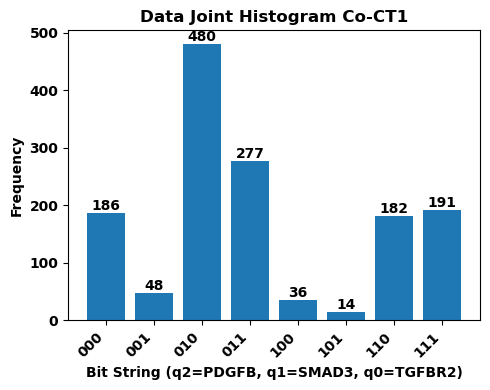

Joint Counts: Counter({'010': 480, '011': 277, '111': 191, '000': 186, '110': 182, '001': 48, '100': 36, '101': 14})
Bit Strings: ['000', '001', '010', '011', '100', '101', '110', '111']


In [ ]:
#joint_counts_ct1_co, bit_strings_ct1_co = create_joint_histogram(Xct1_binary_co)
joint_counts_ct1_co, bit_strings_ct1_co = create_percent_joint_histogram(Xct1_binary_co)

num_qubits = Xct1_binary_co.shape[1] 
plot_joint_histogram(joint_counts_ct1_co, num_qubits = num_qubits, features=gl_source, figsize = (5,4), filename = 'joint_counts_co_ct1.svg', title='Data Joint Histogram Co-CT1' )  # Pass num_qubits
#plot_joint_histogram(histogram_data, figsize=(5,4), filename = 'hist_cc_3_4pi.svg', title= r'Histogram $Ry(3\pi/4)$' )

print("Joint Counts:", joint_counts_ct1_co)
print("Bit Strings:", bit_strings_ct1_co)

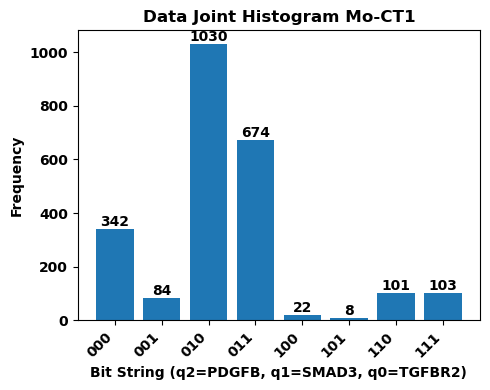

Joint Counts: Counter({'010': 1030, '011': 674, '000': 342, '111': 103, '110': 101, '001': 84, '100': 22, '101': 8})
Bit Strings: ['000', '001', '010', '011', '100', '101', '110', '111']


In [ ]:
#joint_counts_ct1_mo, bit_strings_ct1_mo = create_joint_histogram(Xct1_binary_mo)
joint_counts_ct1_mo, bit_strings_ct1_mo = create_percent_joint_histogram(Xct1_binary_mo)

num_qubits = Xct1_binary_mo.shape[1]  # Get the number of qubits (important!)
plot_joint_histogram(joint_counts_ct1_mo, num_qubits = num_qubits, features=gl_source, figsize = (5,4), filename = 'joint_counts_mo_ct1.svg', title='Data Joint Histogram Mo-CT1' )  # Pass num_qubits

print("Joint Counts:", joint_counts_ct1_mo)
print("Bit Strings:", bit_strings_ct1_mo)

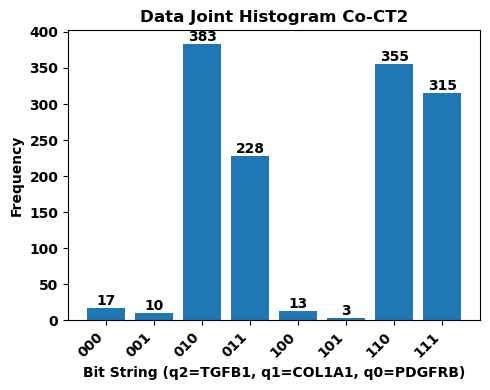

Joint Counts: Counter({'010': 383, '110': 355, '111': 315, '011': 228, '000': 17, '100': 13, '001': 10, '101': 3})
Bit Strings: ['000', '001', '010', '011', '100', '101', '110', '111']


In [ ]:
#joint_counts_ct2_co, bit_strings_ct2_co = create_joint_histogram(Xct2_binary_co)
joint_counts_ct2_co, bit_strings_ct2_co = create_percent_joint_histogram(Xct2_binary_co)

num_qubits2 = Xct2_binary_co.shape[1]  # Get the number of qubits (important!)
plot_joint_histogram(joint_counts_ct2_co, num_qubits = num_qubits2, features=gl_recv, figsize = (5,4), filename = 'joint_counts_co_ct2.svg', title='Data Joint Histogram Co-CT2' )  # Pass num_qubits

print("Joint Counts:", joint_counts_ct2_co)
print("Bit Strings:", bit_strings_ct2_co)

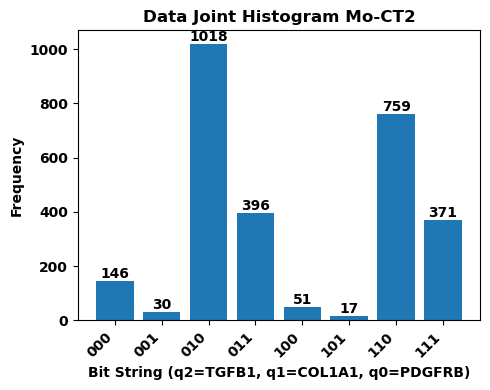

Joint Counts: Counter({'010': 1018, '110': 759, '011': 396, '111': 371, '000': 146, '100': 51, '001': 30, '101': 17})
Bit Strings: ['000', '001', '010', '011', '100', '101', '110', '111']


In [ ]:
#joint_counts_ct2_mo, bit_strings_ct2_mo = create_joint_histogram(Xct2_binary_mo)
joint_counts_ct2_mo, bit_strings_ct2_mo = create_percent_joint_histogram(Xct2_binary_mo)

num_qubits2 = Xct2_binary_mo.shape[1]  # Get the number of qubits (important!)
plot_joint_histogram(joint_counts_ct2_mo, num_qubits = num_qubits2, features=gl_recv, figsize = (5,4), filename = 'joint_counts_mo_ct2.svg', title='Data Joint Histogram Mo-CT2' )  # Pass num_qubits

print("Joint Counts:", joint_counts_ct2_mo)
print("Bit Strings:", bit_strings_ct2_mo)

In [13]:
import sys
import os

# Replace with your actual path
cc_grn_functions_path = r"C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions"
sys.path.append(cc_grn_functions_path)

from quantum_functions import create_grn_ansatz, create_interaction_observable_from_histogram, evaluate_and_plot_ansatz
from quantum_functions import create_parameter_dictionaries, cost_func_vqe, cost_func_wrapper
from quantum_functions import create_interaction_observable_general, create_parameter_dictionaries_from_circuit, create_joint_circuit_from_ansatzes, vqe_solver, vqe_lr_solver
import matplotlib.pyplot as plt

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


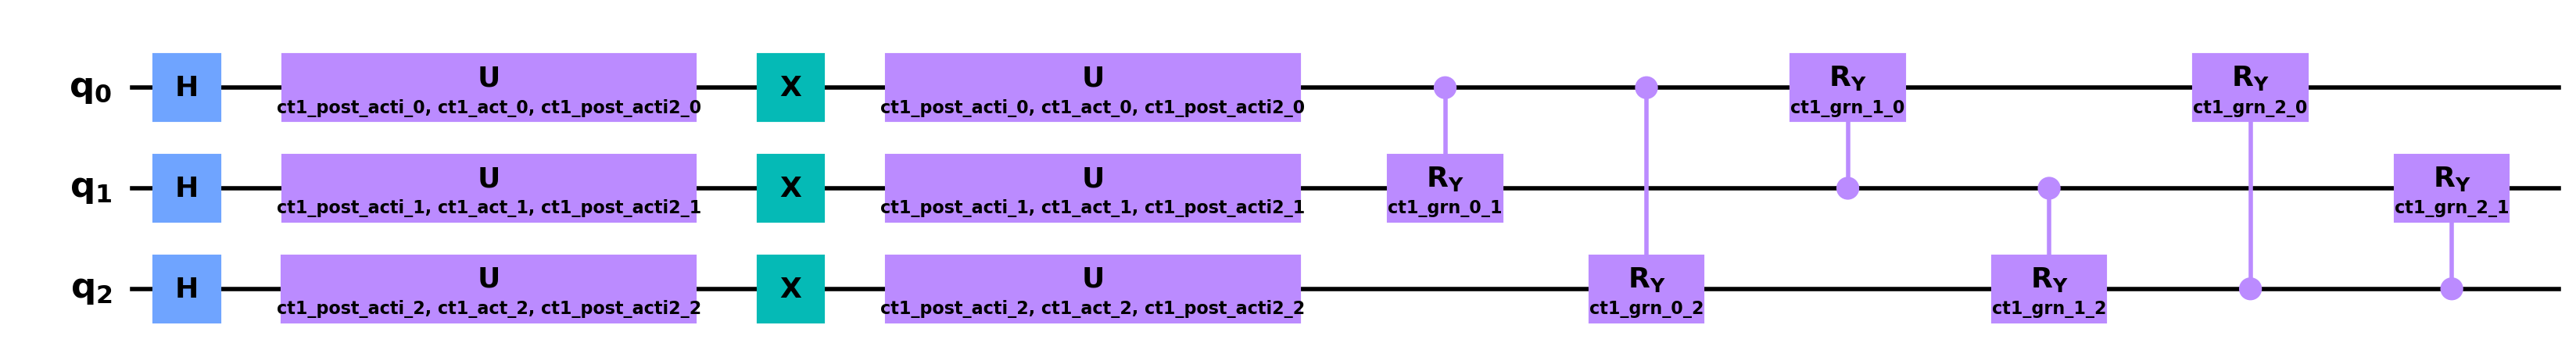

In [14]:
min_ones = 0

ng_ct1 = len(gl_source)  # Assuming gl_source is defined elsewhere
# Create mono coltured grn
ansatz_grn_ct1_mo = create_grn_ansatz(ng_ct1, "CT1")
# Create co cultured grn
ansatz_grn_ct1_co = create_grn_ansatz(ng_ct1, "CT1")
ansatz_grn_ct1_mo.draw(output="mpl", style="clifford", fold=40, scale=2.0, filename='circuit_vqe_opt_ct1.svg')

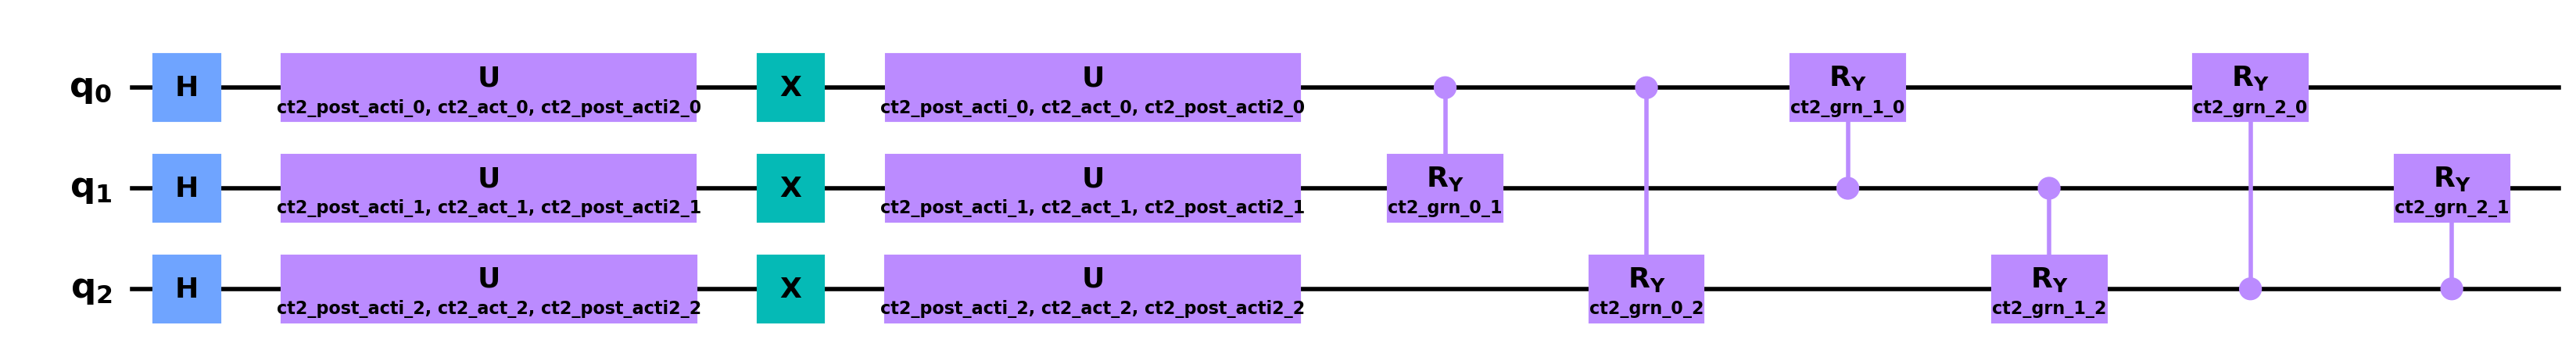

In [15]:
ng_ct2 = len(gl_recv)  #Example for a second cell type
# Create mo cultured grn
ansatz_grn_ct2_mo = create_grn_ansatz(ng_ct2, "CT2")
# Create co cultured grn
ansatz_grn_ct2_co = create_grn_ansatz(ng_ct2, "CT2")
ansatz_grn_ct2_mo.draw(output="mpl", style="clifford", fold=40, scale=2.0, filename='circuit_vqe_opt_ct2.svg')

Interaction observable CT from histogram: SparsePauliOp(['III', 'IIZ', 'IZI', 'IZZ', 'ZII', 'ZIZ', 'ZZI', 'ZZZ'],
              coeffs=[-176.75+0.j,  -44.25+0.j,  105.75+0.j,    4.25+0.j,  -71.  +0.j,
  -41.  +0.j,   25.  +0.j,   12.  +0.j])
Static Parameters: {Parameter(ct1_act_0): 1.5707963267948966, Parameter(ct1_act_1): 1.5707963267948966, Parameter(ct1_act_2): 1.5707963267948966}
Variable Parameters: {Parameter(ct1_grn_0_1): 0.0, Parameter(ct1_grn_0_2): 0.0, Parameter(ct1_grn_1_0): 0.0, Parameter(ct1_grn_1_2): 0.0, Parameter(ct1_grn_2_0): 0.0, Parameter(ct1_grn_2_1): 0.0, Parameter(ct1_post_acti2_0): 0.0, Parameter(ct1_post_acti2_1): 0.0, Parameter(ct1_post_acti2_2): 0.0, Parameter(ct1_post_acti_0): 0.0, Parameter(ct1_post_acti_1): 0.0, Parameter(ct1_post_acti_2): 0.0}
Starting optimization with method: COBYLA
Iteration 0: Current cost: -219.45465247900069
Iteration 20: Current cost: -298.9984787565686
Iteration 40: Current cost: -405.4307339254991
Iteration 60: Current cost: -416

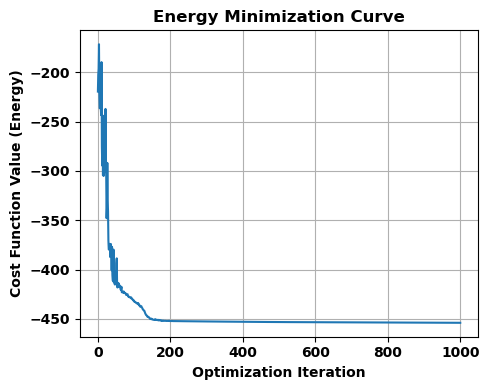

The counts are: {'010': 916, '111': 21, '000': 41, '110': 24, '001': 4, '011': 17, '100': 1}


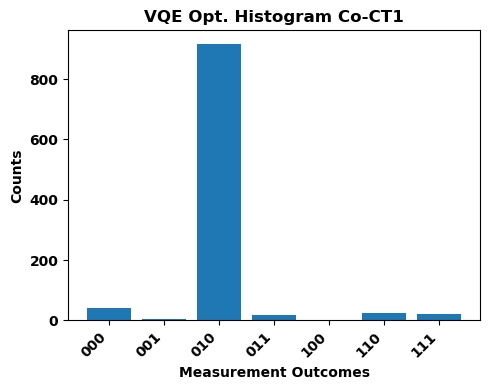

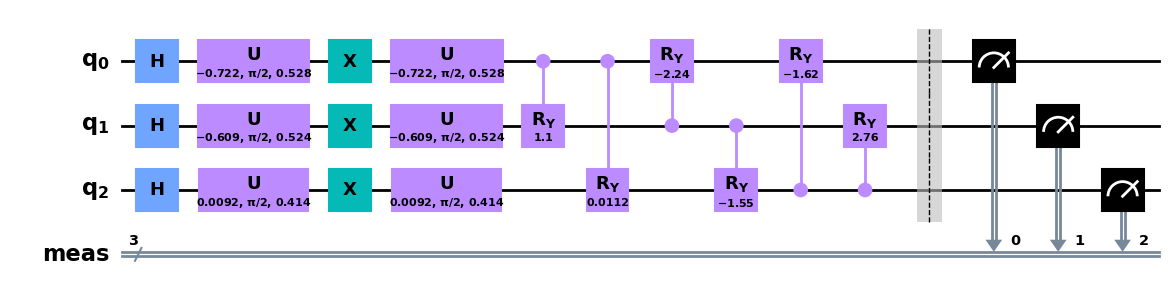

In [16]:
result_interaction_bfgs, optimized_full_params_ct1_co, cost_values = vqe_solver(
    joint_counts_ct1_co,
    ansatz_grn_ct1_co, # Renamed from 'cirquit' for common convention
    ct1_percentages_co, # Renamed from 'act_percentages' for consistency with create_parameter_dictionaries_cust
    cost_func_wrapper, # This function needs to be defined to accept the correct arguments (see comments below)
    min_ones_obs=min_ones, # Added as an explicit argument for flexibility
    optimizer_method="COBYLA",# COBYLA | L-BFGS-B
)

# Plot the cost function values
plt.figure(figsize=(5, 4))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig('vqe_opt_curve_co_ct1.svg', bbox_inches='tight')
plt.show()


counts, bound_circuit = evaluate_and_plot_ansatz(ansatz_grn_ct1_co, optimized_full_params_ct1_co, shots=1024, title="VQE Opt. Histogram Co-CT1", figsize=(5, 4), filename='hist_vqe_opt_co_ct1.svg')

bound_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

Interaction observable CT from histogram: SparsePauliOp(['III', 'IIZ', 'IZI', 'IZZ', 'ZII', 'ZIZ', 'ZZI', 'ZZZ'],
              coeffs=[-295.5 +0.j,  -78.25+0.j,  181.5 +0.j,   10.25+0.j, -237.  +0.j,
  -75.25+0.j,  138.  +0.j,   14.25+0.j])
Static Parameters: {Parameter(ct1_act_0): 1.5707963267948966, Parameter(ct1_act_1): 1.5707963267948966, Parameter(ct1_act_2): 1.5707963267948966}
Variable Parameters: {Parameter(ct1_grn_0_1): 0.0, Parameter(ct1_grn_0_2): 0.0, Parameter(ct1_grn_1_0): 0.0, Parameter(ct1_grn_1_2): 0.0, Parameter(ct1_grn_2_0): 0.0, Parameter(ct1_grn_2_1): 0.0, Parameter(ct1_post_acti2_0): 0.0, Parameter(ct1_post_acti2_1): 0.0, Parameter(ct1_post_acti2_2): 0.0, Parameter(ct1_post_acti_0): 0.0, Parameter(ct1_post_acti_1): 0.0, Parameter(ct1_post_acti_2): 0.0}
Starting optimization with method: COBYLA
Iteration 0: Current cost: -367.550953074176
Iteration 20: Current cost: -516.6852382318763
Iteration 40: Current cost: -807.7440294363042
Iteration 60: Current cost: -868.5

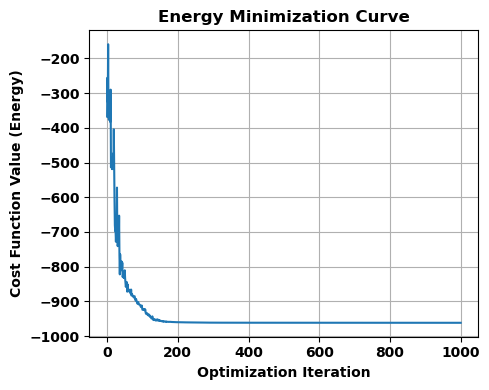

The counts are: {'000': 56, '010': 914, '011': 14, '001': 7, '110': 5, '100': 24, '101': 4}


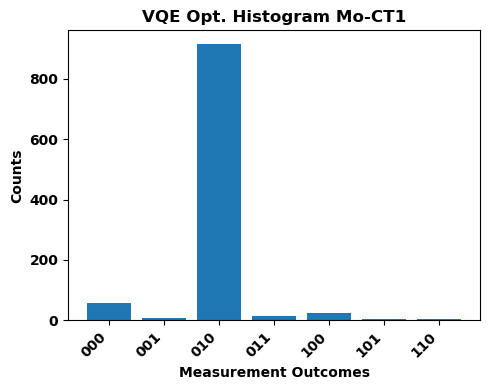

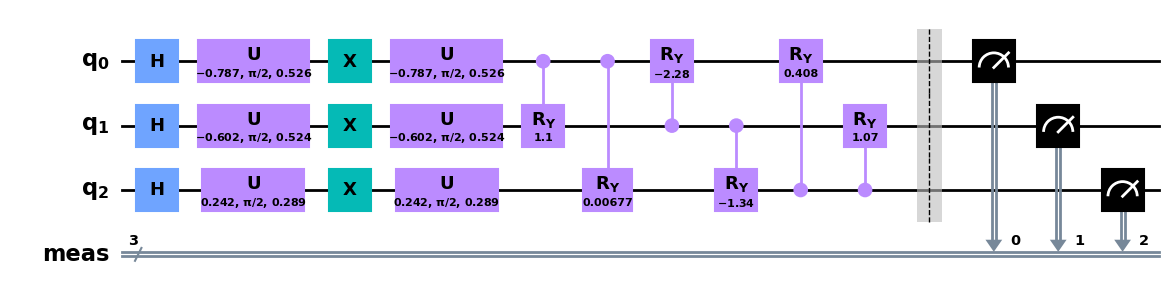

In [17]:
result_interaction_bfgs, optimized_full_params_ct1_mo, cost_values = vqe_solver(
    joint_counts_ct1_mo,
    ansatz_grn_ct1_mo, # Renamed from 'cirquit' for common convention
    ct1_percentages_mo, # Renamed from 'act_percentages' for consistency with create_parameter_dictionaries_cust
    cost_func_wrapper, # This function needs to be defined to accept the correct arguments (see comments below)
    min_ones_obs=min_ones, # Added as an explicit argument for flexibility
    optimizer_method="COBYLA",# COBYLA | L-BFGS-B
)

# Plot the cost function values
plt.figure(figsize=(5, 4))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig('vqe_opt_curve_mo_ct1.svg', bbox_inches='tight')
plt.show()
counts, bound_circuit = evaluate_and_plot_ansatz(ansatz_grn_ct1_mo, optimized_full_params_ct1_mo, shots=1024, title="VQE Opt. Histogram Mo-CT1", figsize=(5, 4), filename='hist_vqe_opt_mo_ct1.svg')

bound_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

Interaction observable CT from histogram: SparsePauliOp(['III', 'IIZ', 'IZI', 'IZZ', 'ZII', 'ZIZ', 'ZZI', 'ZZZ'],
              coeffs=[-165.5 +0.j,  -26.5 +0.j,  154.75+0.j,   22.25+0.j,    6.  +0.j,
  -14.  +0.j,   -8.75+0.j,   14.75+0.j])
Static Parameters: {Parameter(ct2_act_0): 1.5707963267948966, Parameter(ct2_act_1): 1.5707963267948966, Parameter(ct2_act_2): 1.5707963267948966}
Variable Parameters: {Parameter(ct2_grn_0_1): 0.0, Parameter(ct2_grn_0_2): 0.0, Parameter(ct2_grn_1_0): 0.0, Parameter(ct2_grn_1_2): 0.0, Parameter(ct2_grn_2_0): 0.0, Parameter(ct2_grn_2_1): 0.0, Parameter(ct2_post_acti2_0): 0.0, Parameter(ct2_post_acti2_1): 0.0, Parameter(ct2_post_acti2_2): 0.0, Parameter(ct2_post_acti_0): 0.0, Parameter(ct2_post_acti_1): 0.0, Parameter(ct2_post_acti_2): 0.0}
Starting optimization with method: COBYLA
Iteration 0: Current cost: -221.24745274352307
Iteration 20: Current cost: -323.3837422656654
Iteration 40: Current cost: -343.41010756674984
Iteration 60: Current cost: -34

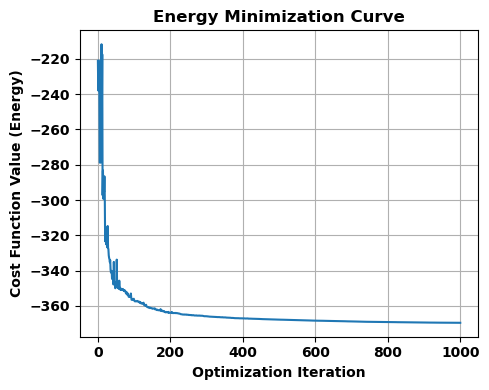

The counts are: {'010': 934, '110': 51, '000': 13, '001': 9, '011': 9, '111': 7, '101': 1}


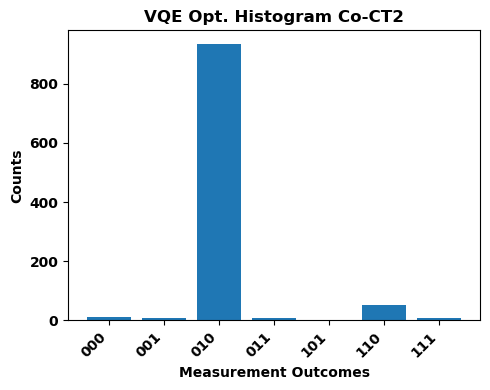

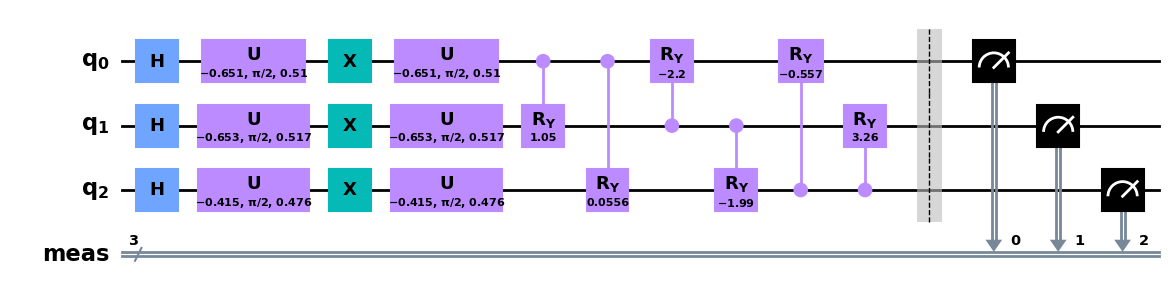

In [18]:
result_interaction_bfgs, optimized_full_params_ct2_co, cost_values = vqe_solver(
    joint_counts_ct2_co,
    ansatz_grn_ct2_co, # Renamed from 'cirquit' for common convention
    ct2_percentages_co, # Renamed from 'act_percentages' for consistency with create_parameter_dictionaries_cust
    cost_func_wrapper, # This function needs to be defined to accept the correct arguments (see comments below)
    min_ones_obs=min_ones, # Added as an explicit argument for flexibility
    optimizer_method="COBYLA",# COBYLA | L-BFGS-B
)

# Plot the cost function values
plt.figure(figsize=(5, 4))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig('vqe_opt_curve_co_ct2.svg', bbox_inches='tight')
plt.show()
counts, bound_circuit = evaluate_and_plot_ansatz(ansatz_grn_ct2_co, optimized_full_params_ct2_co, shots=1024, title="VQE Opt. Histogram Co-CT2", figsize=(5, 4), filename='hist_vqe_opt_co_ct2.svg')

bound_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

Interaction observable CT from histogram: SparsePauliOp(['III', 'IIZ', 'IZI', 'IZZ', 'ZII', 'ZIZ', 'ZZI', 'ZZZ'],
              coeffs=[-348.5+0.j, -145. +0.j,  287.5+0.j,  107.5+0.j,  -49. +0.j,  -39.5+0.j,
   22. +0.j,   19. +0.j])
Static Parameters: {Parameter(ct2_act_0): 1.5707963267948966, Parameter(ct2_act_1): 1.5707963267948966, Parameter(ct2_act_2): 1.5707963267948966}
Variable Parameters: {Parameter(ct2_grn_0_1): 0.0, Parameter(ct2_grn_0_2): 0.0, Parameter(ct2_grn_1_0): 0.0, Parameter(ct2_grn_1_2): 0.0, Parameter(ct2_grn_2_0): 0.0, Parameter(ct2_grn_2_1): 0.0, Parameter(ct2_post_acti2_0): 0.0, Parameter(ct2_post_acti2_1): 0.0, Parameter(ct2_post_acti2_2): 0.0, Parameter(ct2_post_acti_0): 0.0, Parameter(ct2_post_acti_1): 0.0, Parameter(ct2_post_acti_2): 0.0}
Starting optimization with method: COBYLA
Iteration 0: Current cost: -424.2323886327105
Iteration 20: Current cost: -768.843999319387
Iteration 40: Current cost: -834.9352331931881
Iteration 60: Current cost: -887.437447292

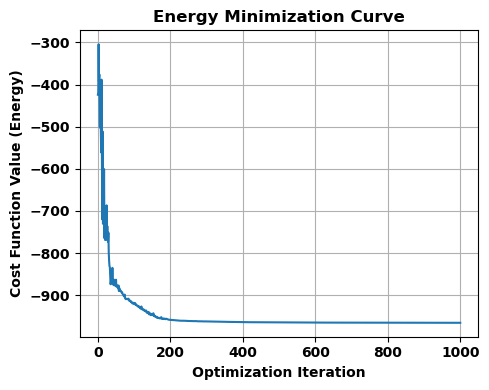

The counts are: {'010': 922, '110': 58, '000': 23, '011': 12, '001': 2, '100': 3, '111': 4}


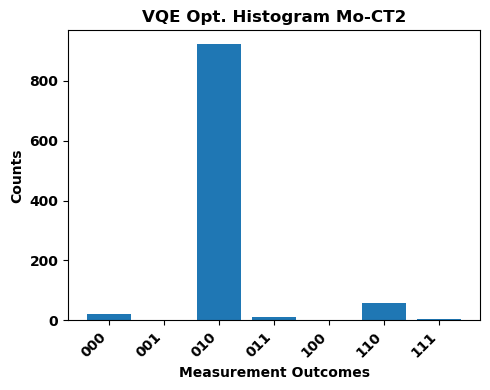

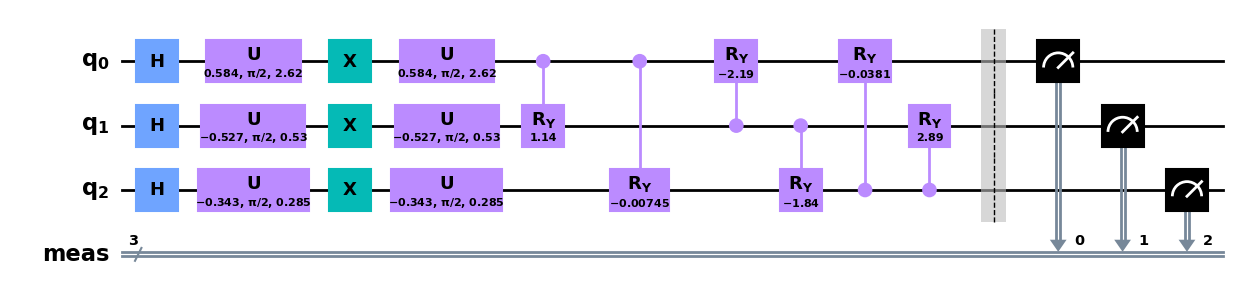

In [19]:
result_interaction_bfgs, optimized_full_params_ct2_mo, cost_values = vqe_solver(
    joint_counts_ct2_mo,
    ansatz_grn_ct2_mo, # Renamed from 'cirquit' for common convention
    ct2_percentages_mo, # Renamed from 'act_percentages' for consistency with create_parameter_dictionaries_cust
    cost_func_wrapper, # This function needs to be defined to accept the correct arguments (see comments below)
    min_ones_obs=min_ones, # Added as an explicit argument for flexibility
    optimizer_method="COBYLA",# COBYLA | L-BFGS-B
)

# Plot the cost function values
plt.figure(figsize=(5, 4))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig('vqe_opt_curve_mo_ct2.svg', bbox_inches='tight')
plt.show()
counts, bound_circuit = evaluate_and_plot_ansatz(ansatz_grn_ct2_mo, optimized_full_params_ct2_mo, shots=1024, title="VQE Opt. Histogram Mo-CT2", figsize=(5, 4), filename='hist_vqe_opt_mo_ct2.svg')

bound_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

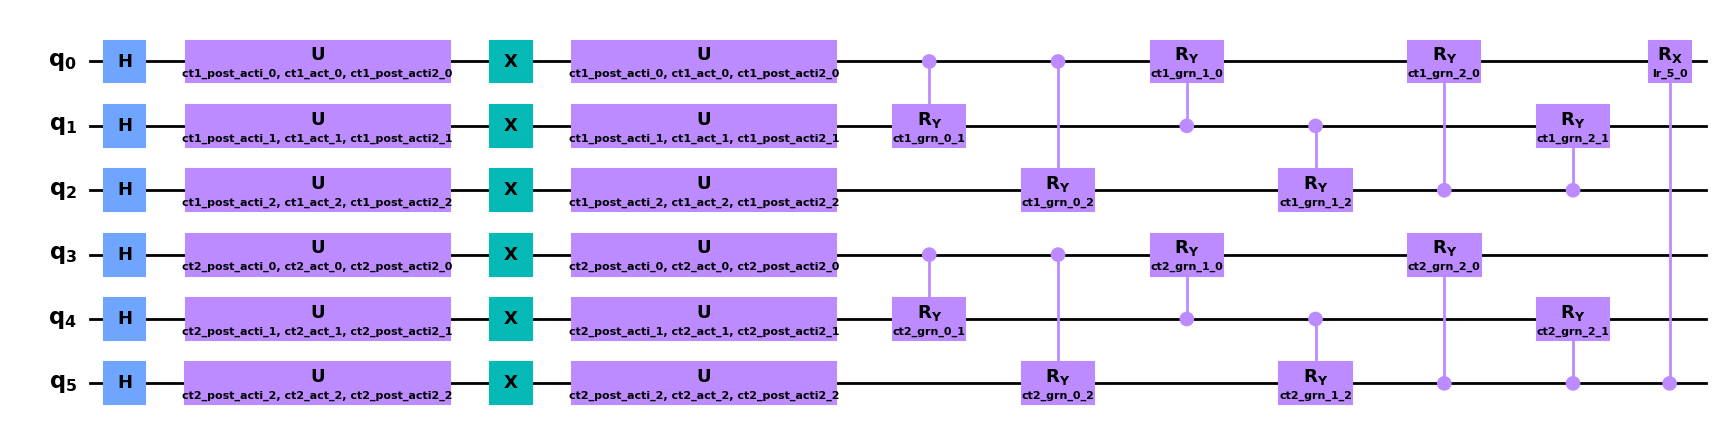

In [20]:
interactions_lr = {
    (ng_ct1 + ng_ct2 - 1, 0): 10,
}
cc_grn_circuit_co = create_joint_circuit_from_ansatzes(ansatz_grn_ct1_co, ansatz_grn_ct2_co, interactions = interactions_lr)
cc_grn_circuit_mo = create_joint_circuit_from_ansatzes(ansatz_grn_ct1_mo, ansatz_grn_ct2_mo, interactions = interactions_lr)
cc_grn_circuit_mo.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

--- Starting VQE LR Solver ---
Initial combined parameters for LR optimization: {Parameter(ct1_act_0): 1.5707963267948966, Parameter(ct1_act_1): 1.5707963267948966, Parameter(ct1_act_2): 1.5707963267948966, Parameter(ct1_grn_0_1): 1.102161165025547, Parameter(ct1_grn_0_2): 0.01120533862339768, Parameter(ct1_grn_1_0): -2.2407652528672, Parameter(ct1_grn_1_2): -1.5465782512393573, Parameter(ct1_grn_2_0): -1.620922129194208, Parameter(ct1_grn_2_1): 2.7568026070955285, Parameter(ct1_post_acti2_0): 0.5283717635457106, Parameter(ct1_post_acti2_1): 0.5241474688041767, Parameter(ct1_post_acti2_2): 0.4137584352655798, Parameter(ct1_post_acti_0): -0.7223235066360323, Parameter(ct1_post_acti_1): -0.609168171446605, Parameter(ct1_post_acti_2): 0.00919852677488147, Parameter(ct2_act_0): 1.5707963267948966, Parameter(ct2_act_1): 1.5707963267948966, Parameter(ct2_act_2): 1.5707963267948966, Parameter(ct2_grn_0_1): 1.048682213475077, Parameter(ct2_grn_0_2): 0.05559913819276013, Parameter(ct2_grn_1_0):

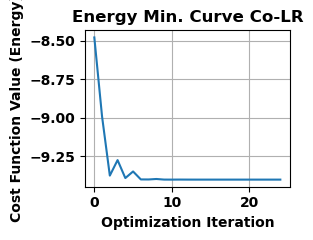

The counts are: {'010010': 8222, '010111': 136, '010000': 326, '111011': 56, '010110': 224, '110011': 481, '011010': 72, '010001': 38, '000010': 199, '010011': 112, '110111': 12, '100011': 21, '110001': 19, '011011': 2, '110110': 10, '001010': 29, '000011': 2, '000111': 2, '001011': 1, '010100': 2, '000110': 3, '000000': 8, '100001': 1, '011000': 3, '111111': 2, '110101': 1, '110000': 1, '110010': 2, '101011': 4, '111001': 1, '001000': 1, '000100': 1, '111110': 2, '010101': 2, '011110': 1, '100111': 1}


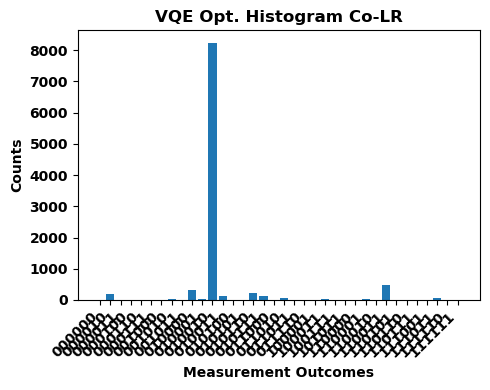

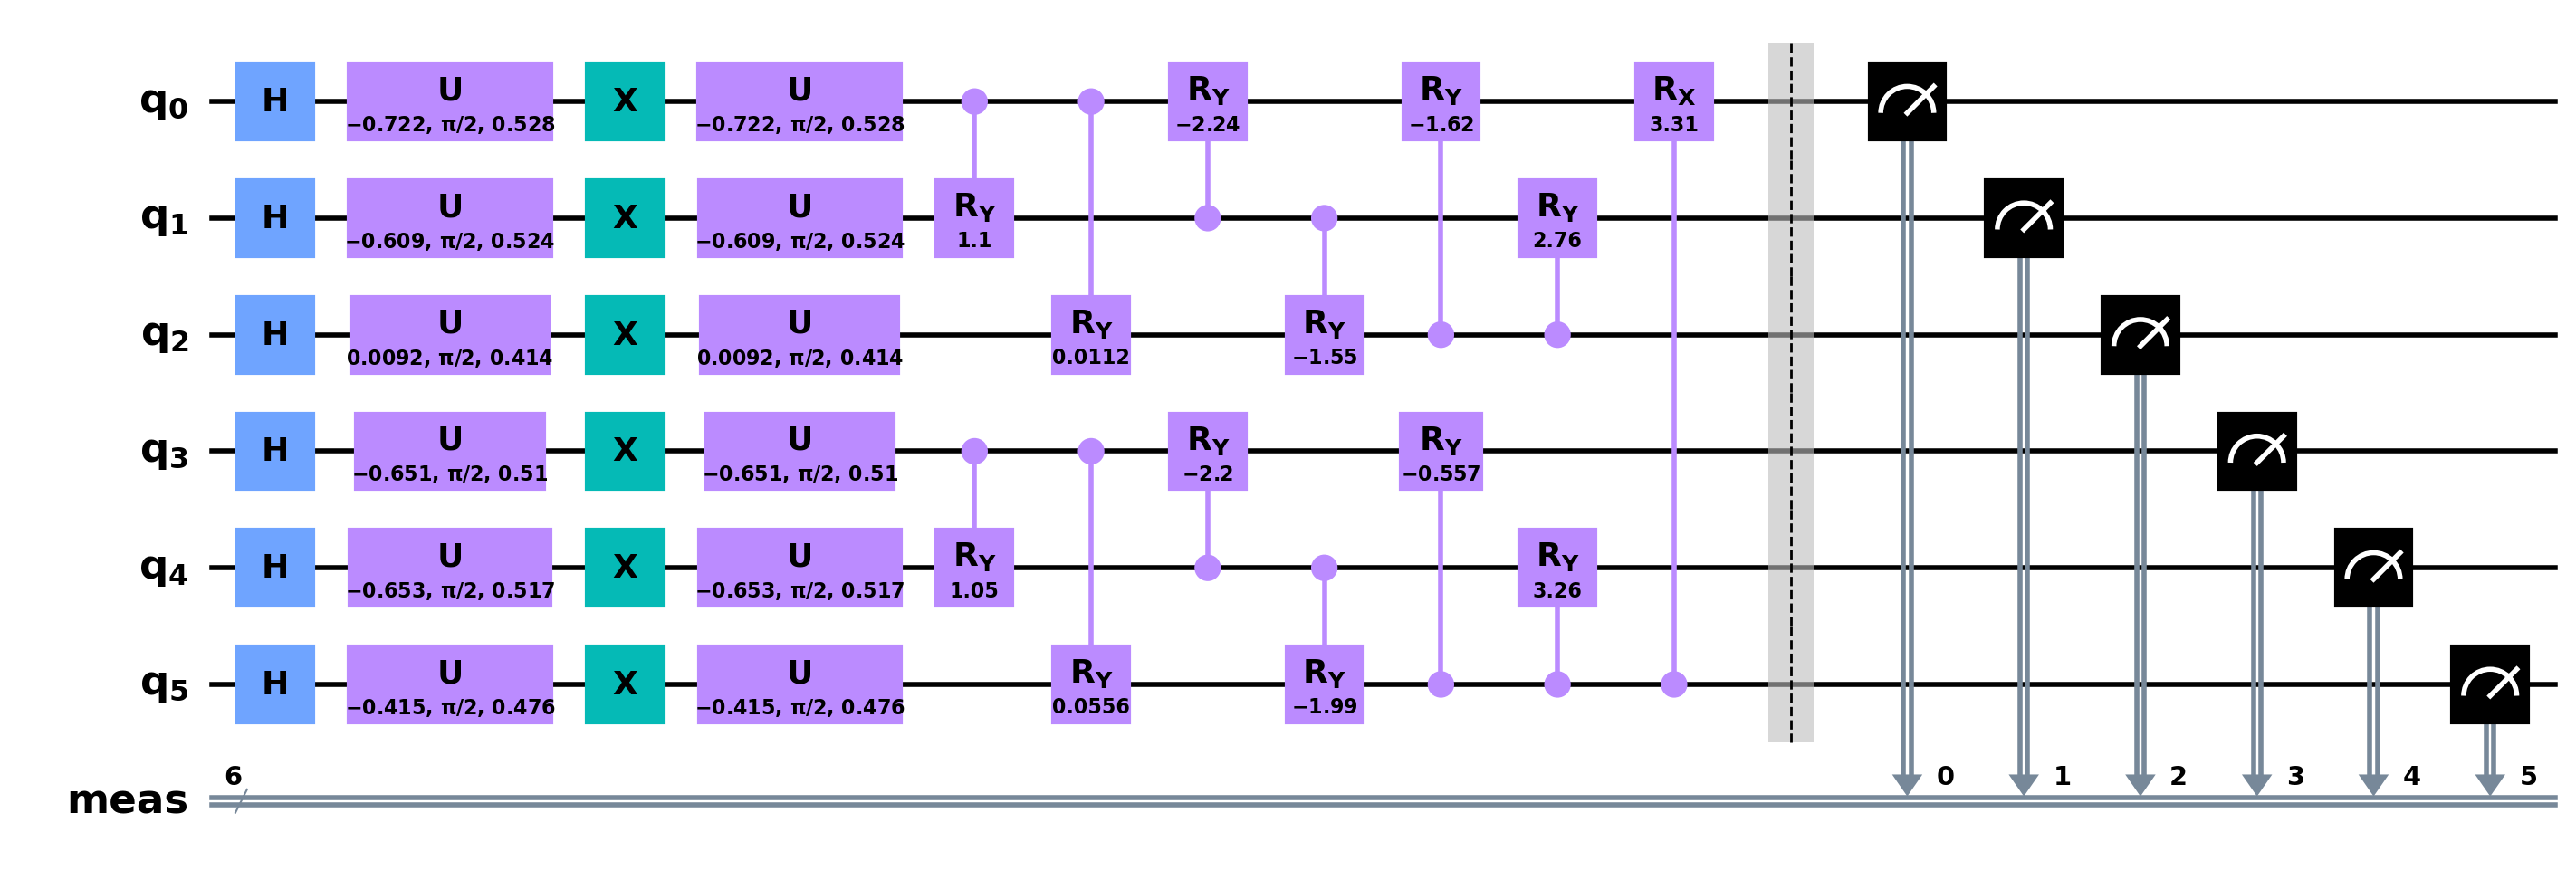

In [21]:
# --- Calling the vqe_lr_solver function with your variables ---
print("--- Starting VQE LR Solver ---")
result_lr_bfgs, optimized_full_params_lr_co, cost_values_from_solver = vqe_lr_solver(
    cc_grn_circuit_co,
    optimized_full_params_ct1_co,
    optimized_full_params_ct2_co,
    interactions_lr,
    ansatz_grn_ct1_co.num_qubits,
    ansatz_grn_ct2_co.num_qubits,
    cost_func_wrapper,
    optimizer_method="COBYLA"
)

print("\n--- VQE LR Solver Completed ---")
print("Final optimized parameters:", optimized_full_params_lr_co)

# Plot the cost function values
plt.figure(figsize=(3, 2.5))
plt.plot(cost_values_from_solver)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Min. Curve Co-LR")
plt.grid(True)
plt.tight_layout()
plt.savefig('vqe_opt_curve_co_lr.svg', bbox_inches='tight')
plt.show()

counts_cc_grn_co, bound_circuit = evaluate_and_plot_ansatz(cc_grn_circuit_co, optimized_full_params_lr_co, shots=10000, title="VQE Opt. Histogram Co-LR", figsize=(5, 4), filename='hist_vqe_opt_co_lr.svg')

bound_circuit.draw(output="mpl", style="clifford", fold=40, scale=2.0, filename='circuit_vqe_opt_co_lr.svg')


--- Starting VQE LR Solver ---
Initial combined parameters for LR optimization: {Parameter(ct1_act_0): 1.5707963267948966, Parameter(ct1_act_1): 1.5707963267948966, Parameter(ct1_act_2): 1.5707963267948966, Parameter(ct1_grn_0_1): 1.1005447648170414, Parameter(ct1_grn_0_2): 0.006773883660176917, Parameter(ct1_grn_1_0): -2.2799745312102173, Parameter(ct1_grn_1_2): -1.3391079582263727, Parameter(ct1_grn_2_0): 0.40750279178017096, Parameter(ct1_grn_2_1): 1.0715079459839718, Parameter(ct1_post_acti2_0): 0.5255925914059535, Parameter(ct1_post_acti2_1): 0.524341756631998, Parameter(ct1_post_acti2_2): 0.2890768834238732, Parameter(ct1_post_acti_0): -0.7868937656954804, Parameter(ct1_post_acti_1): -0.6022030280543046, Parameter(ct1_post_acti_2): 0.24224415783295217, Parameter(ct2_act_0): 1.5707963267948966, Parameter(ct2_act_1): 1.5707963267948966, Parameter(ct2_act_2): 1.5707963267948966, Parameter(ct2_grn_0_1): 1.1353401322406493, Parameter(ct2_grn_0_2): -0.007453873371502769, Parameter(ct2_

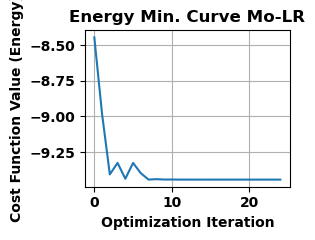

The counts are: {'010011': 152, '010010': 8098, '110011': 541, '010101': 45, '010000': 383, '010100': 135, '000010': 281, '001000': 1, '001010': 15, '010001': 45, '100011': 11, '111011': 28, '110001': 19, '110101': 4, '011010': 132, '110111': 4, '010110': 49, '000000': 8, '011000': 1, '000100': 7, '100001': 4, '110110': 2, '110000': 5, '111101': 1, '010111': 12, '110100': 2, '000111': 1, '000110': 1, '000011': 2, '011100': 1, '111001': 2, '011011': 2, '011101': 2, '110010': 1, '000001': 1, '011110': 1, '111000': 1}


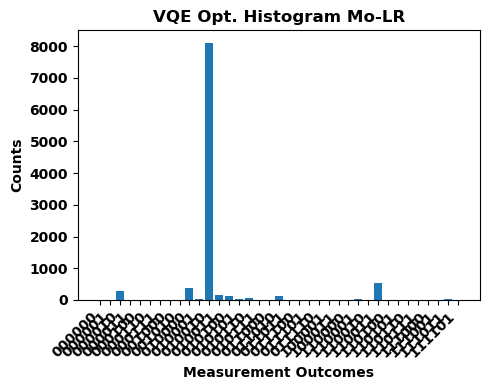

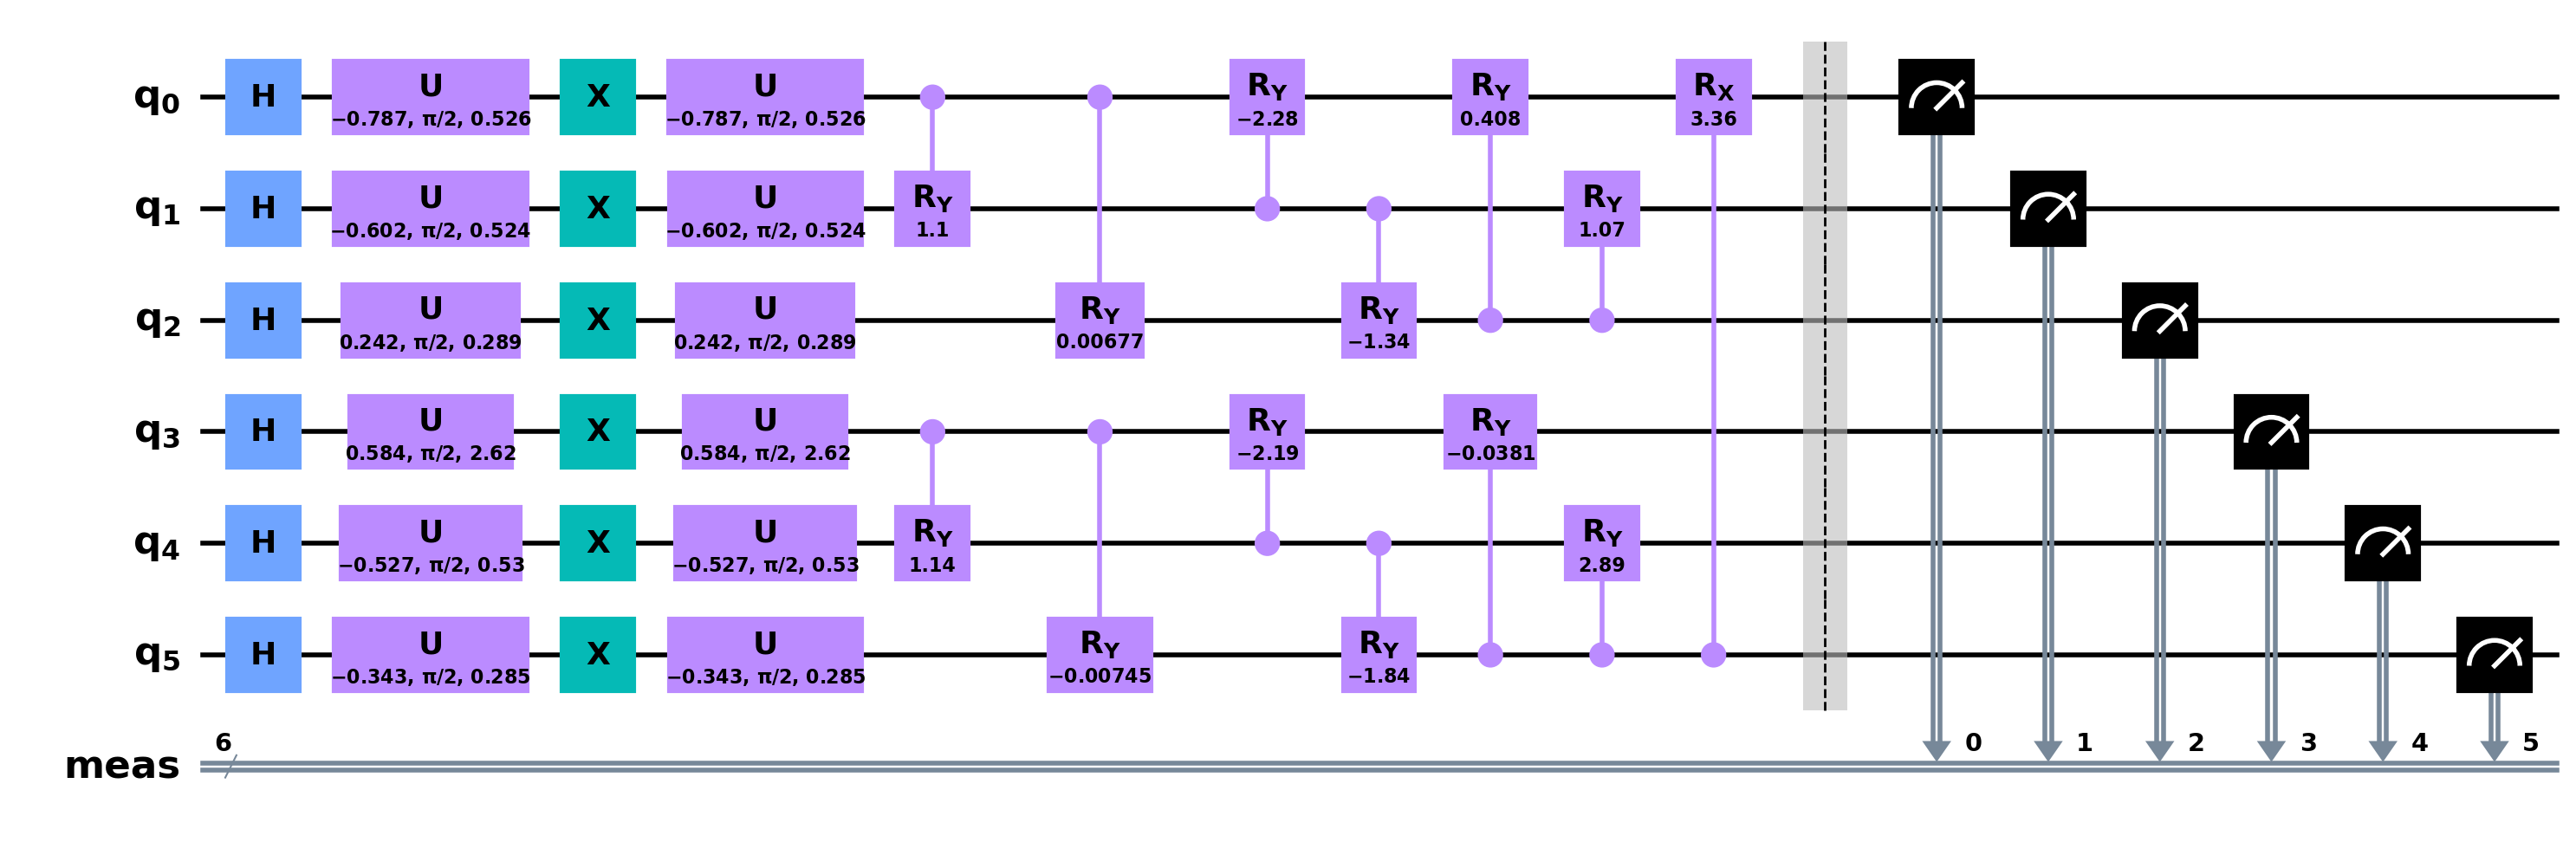

In [22]:
# --- Calling the vqe_lr_solver function with your variables ---
print("--- Starting VQE LR Solver ---")
result_lr_bfgs, optimized_full_params_lr_mo, cost_values_from_solver = vqe_lr_solver(
    cc_grn_circuit_mo,
    optimized_full_params_ct1_mo,
    optimized_full_params_ct2_mo,
    interactions_lr,
    ansatz_grn_ct1_mo.num_qubits,
    ansatz_grn_ct2_mo.num_qubits,
    cost_func_wrapper,
    optimizer_method="COBYLA"
)

print("\n--- VQE LR Solver Completed ---")
print("Final optimized parameters:", optimized_full_params_lr_mo)

# --- Plotting the cost values ---
plt.figure(figsize=(3, 2.5))
plt.plot(cost_values_from_solver)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Min. Curve Mo-LR")
plt.grid(True)
plt.tight_layout()
plt.savefig('vqe_opt_curve_mo_lr.svg', bbox_inches='tight')
plt.show()
counts_cc_grn_mo, bound_circuit = evaluate_and_plot_ansatz(cc_grn_circuit_mo, optimized_full_params_lr_mo, shots=10000, title="VQE Opt. Histogram Mo-LR", figsize=(5, 4), filename='hist_vqe_opt_mo_lr.svg')
bound_circuit.draw(output="mpl", style="clifford", fold=40, scale=2.0, filename='circuit_vqe_opt_mo_lr.svg')

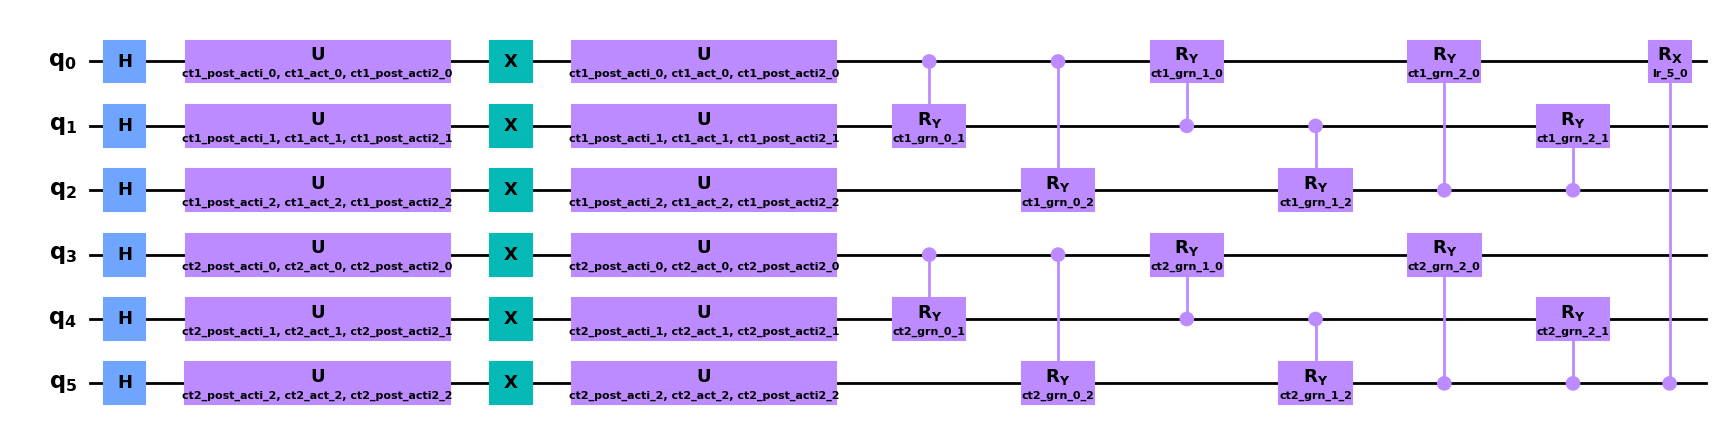

In [23]:
interactions_lr = {
    (ng_ct1 + ng_ct2 - 1, 0): 0,
}
cc_grn_circuit_co0 = create_joint_circuit_from_ansatzes(ansatz_grn_ct1_co, ansatz_grn_ct2_co, interactions = interactions_lr)
cc_grn_circuit_mo0 = create_joint_circuit_from_ansatzes(ansatz_grn_ct1_mo, ansatz_grn_ct2_mo, interactions = interactions_lr)
cc_grn_circuit_mo0.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

--- Starting VQE LR Solver ---
Initial combined parameters for LR optimization: {Parameter(ct1_act_0): 1.5707963267948966, Parameter(ct1_act_1): 1.5707963267948966, Parameter(ct1_act_2): 1.5707963267948966, Parameter(ct1_grn_0_1): 1.102161165025547, Parameter(ct1_grn_0_2): 0.01120533862339768, Parameter(ct1_grn_1_0): -2.2407652528672, Parameter(ct1_grn_1_2): -1.5465782512393573, Parameter(ct1_grn_2_0): -1.620922129194208, Parameter(ct1_grn_2_1): 2.7568026070955285, Parameter(ct1_post_acti2_0): 0.5283717635457106, Parameter(ct1_post_acti2_1): 0.5241474688041767, Parameter(ct1_post_acti2_2): 0.4137584352655798, Parameter(ct1_post_acti_0): -0.7223235066360323, Parameter(ct1_post_acti_1): -0.609168171446605, Parameter(ct1_post_acti_2): 0.00919852677488147, Parameter(ct2_act_0): 1.5707963267948966, Parameter(ct2_act_1): 1.5707963267948966, Parameter(ct2_act_2): 1.5707963267948966, Parameter(ct2_grn_0_1): 1.048682213475077, Parameter(ct2_grn_0_2): 0.05559913819276013, Parameter(ct2_grn_1_0):

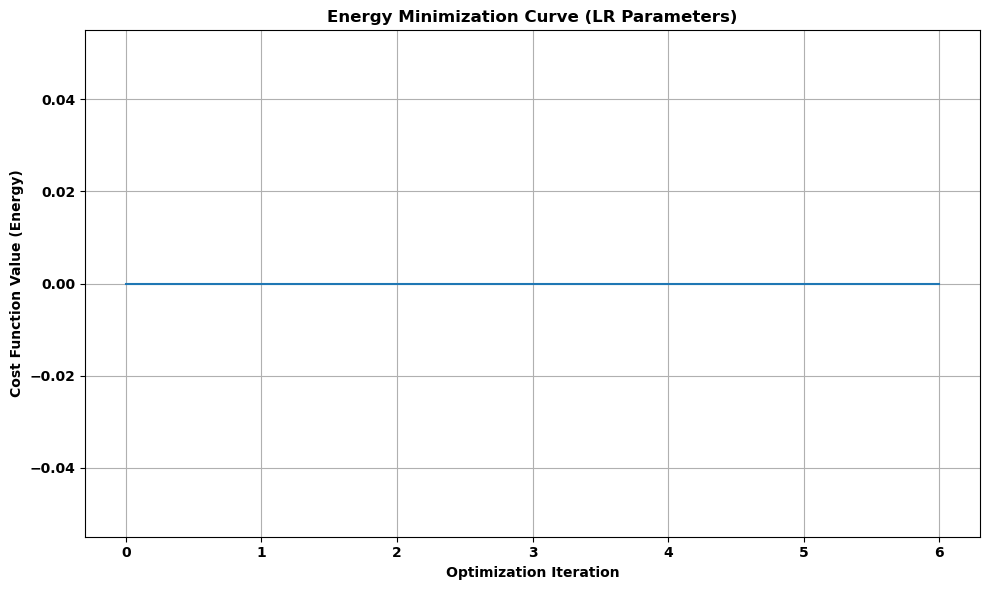

The counts are: {'010010': 8188, '010000': 336, '110010': 495, '010001': 44, '010110': 225, '010011': 112, '010111': 130, '000010': 213, '100010': 17, '111010': 43, '011010': 68, '110000': 19, '000111': 6, '110110': 15, '110111': 2, '010100': 5, '000000': 8, '001010': 31, '110011': 6, '011111': 1, '000011': 5, '000110': 7, '110001': 3, '111110': 2, '001111': 3, '110100': 1, '000100': 1, '010101': 2, '101010': 3, '001110': 1, '001000': 1, '001001': 1, '011110': 3, '111111': 1, '011000': 1, '000001': 1}


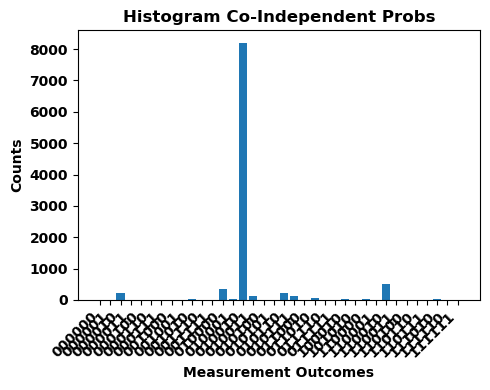

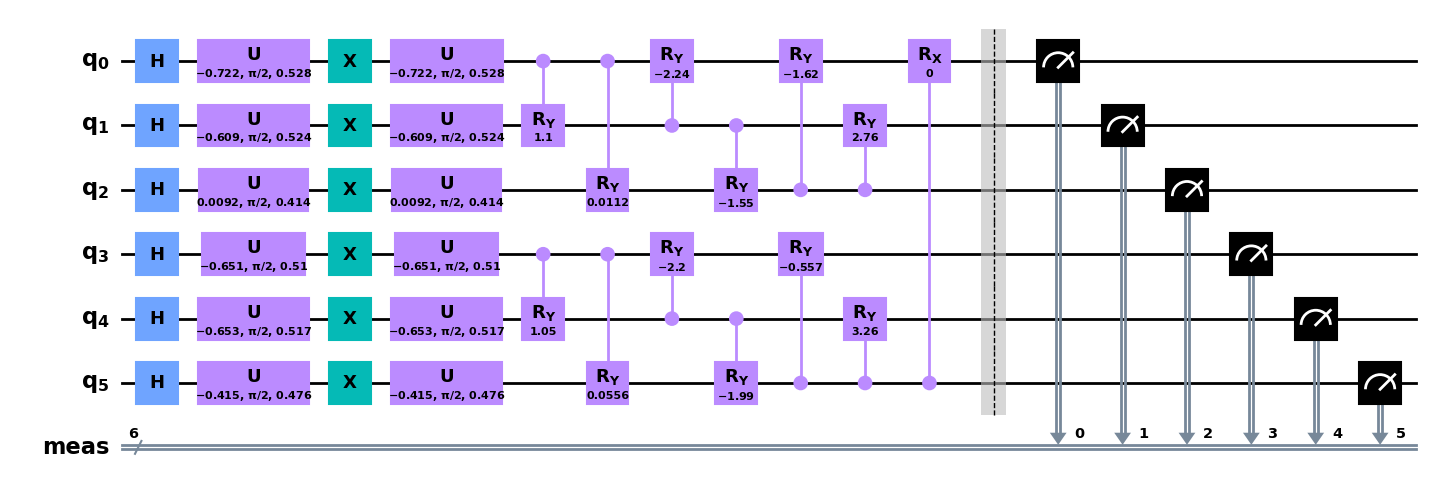

In [24]:
# --- Calling the vqe_lr_solver function with your variables ---
print("--- Starting VQE LR Solver ---")
result_lr_bfgs, optimized_full_params_lr_co0, cost_values_from_solver = vqe_lr_solver(
    cc_grn_circuit_co0,
    optimized_full_params_ct1_co,
    optimized_full_params_ct2_co,
    interactions_lr,
    ansatz_grn_ct1_co.num_qubits,
    ansatz_grn_ct2_co.num_qubits,
    cost_func_wrapper,
    optimizer_method="COBYLA"
)

print("\n--- VQE LR Solver Completed ---")
print("Final optimized parameters:", optimized_full_params_lr_co0)

# --- Plotting the cost values ---
plt.figure(figsize=(10, 6))
plt.plot(cost_values_from_solver)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve (LR Parameters)")
plt.grid(True)
plt.tight_layout()
plt.show()
counts_cc_grn_co0, bound_circuit = evaluate_and_plot_ansatz(cc_grn_circuit_co0, optimized_full_params_lr_co0, shots=10000, title="Histogram Co-Independent Probs", figsize=(5, 4), filename='hist_base_co_lr.svg')

bound_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

--- Starting VQE LR Solver ---
Initial combined parameters for LR optimization: {Parameter(ct1_act_0): 1.5707963267948966, Parameter(ct1_act_1): 1.5707963267948966, Parameter(ct1_act_2): 1.5707963267948966, Parameter(ct1_grn_0_1): 1.1005447648170414, Parameter(ct1_grn_0_2): 0.006773883660176917, Parameter(ct1_grn_1_0): -2.2799745312102173, Parameter(ct1_grn_1_2): -1.3391079582263727, Parameter(ct1_grn_2_0): 0.40750279178017096, Parameter(ct1_grn_2_1): 1.0715079459839718, Parameter(ct1_post_acti2_0): 0.5255925914059535, Parameter(ct1_post_acti2_1): 0.524341756631998, Parameter(ct1_post_acti2_2): 0.2890768834238732, Parameter(ct1_post_acti_0): -0.7868937656954804, Parameter(ct1_post_acti_1): -0.6022030280543046, Parameter(ct1_post_acti_2): 0.24224415783295217, Parameter(ct2_act_0): 1.5707963267948966, Parameter(ct2_act_1): 1.5707963267948966, Parameter(ct2_act_2): 1.5707963267948966, Parameter(ct2_grn_0_1): 1.1353401322406493, Parameter(ct2_grn_0_2): -0.007453873371502769, Parameter(ct2_

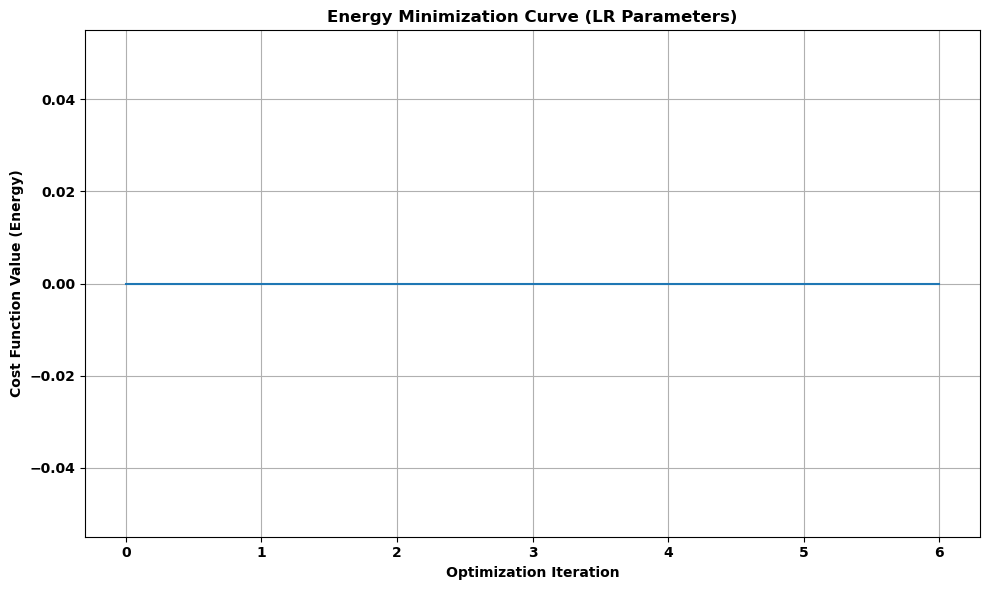

The counts are: {'010010': 8171, '110000': 17, '000100': 6, '000010': 251, '110010': 526, '010011': 146, '010000': 320, '011010': 121, '011100': 2, '010001': 57, '001010': 14, '010100': 161, '010111': 12, '010101': 51, '111100': 2, '010110': 46, '111010': 26, '110100': 8, '110001': 5, '110101': 2, '000000': 15, '011000': 5, '011101': 1, '000011': 3, '110011': 6, '110110': 4, '000110': 2, '100010': 12, '000101': 2, '001111': 1, '111000': 1, '111101': 1, '100000': 1, '011011': 1, '011110': 1}


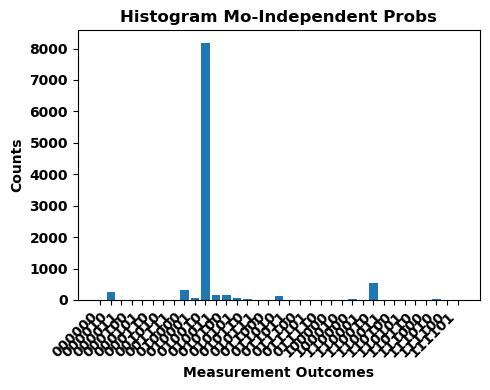

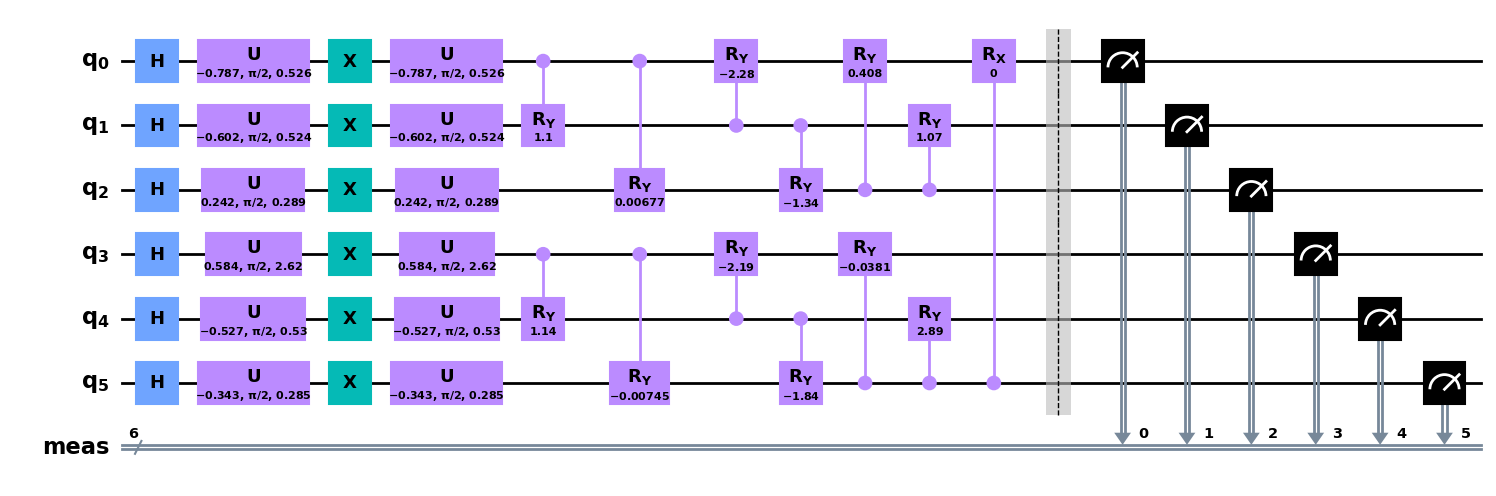

In [25]:
# --- Calling the vqe_lr_solver function with your variables ---
print("--- Starting VQE LR Solver ---")
result_lr_bfgs, optimized_full_params_lr_mo0, cost_values_from_solver = vqe_lr_solver(
    cc_grn_circuit_mo0,
    optimized_full_params_ct1_mo,
    optimized_full_params_ct2_mo,
    interactions_lr,
    ansatz_grn_ct1_mo.num_qubits,
    ansatz_grn_ct2_mo.num_qubits,
    cost_func_wrapper,
    optimizer_method="COBYLA"
)

print("\n--- VQE LR Solver Completed ---")
print("Final optimized parameters:", optimized_full_params_lr_mo0)

# --- Plotting the cost values ---
plt.figure(figsize=(10, 6))
plt.plot(cost_values_from_solver)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve (LR Parameters)")
plt.grid(True)
plt.tight_layout()
plt.show()
counts_cc_grn_mo0, bound_circuit = evaluate_and_plot_ansatz(cc_grn_circuit_mo0, optimized_full_params_lr_mo0, shots=10000, title="Histogram Mo-Independent Probs", figsize=(5, 4), filename='hist_base_mo_lr.svg')

bound_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

In [26]:
def filter_bitstrings_from_interactions(interactions_lr, num_qubits):
    """
    Generates bit string patterns based on the given interactions_lr
    for plotting specific bitstring patterns.
    Args:
        interactions_lr (dict): A dictionary representing interactions,
                                 where keys are tuples of qubit indices
                                 and values are interaction strengths.
        num_qubits (int): The total number of qubits in the system.

    Returns:
        list: A list of bit string patterns with '1' at the interacting
              qubit positions and '0' elsewhere.
    """
    patterns = []
    for interaction in interactions_lr:
        pattern = ['.'] * num_qubits
        for qubit_index in interaction:
            if 0 <= qubit_index < num_qubits:
                pattern[num_qubits - 1 - qubit_index] = '1'  # Adjust for bit order
        patterns.append("".join(pattern))
    return patterns

bitstring_patterns = filter_bitstrings_from_interactions(interactions_lr, cc_grn_circuit_co.num_qubits)
print(bitstring_patterns)

['1....1']


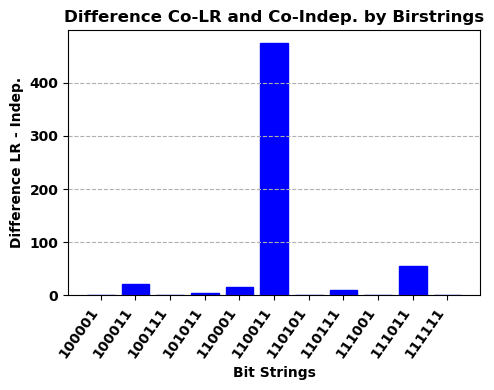

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assume counts_cc_grn_co0 and counts_cc_grn_co are defined dictionaries here.
# Assume bitstring_patterns is a defined list of patterns here.

differences_co = {}

# Calculate the differences, handling cases where bitstrings are not common
all_bitstrings = set(counts_cc_grn_co0.keys()) | set(counts_cc_grn_co.keys())

for key in all_bitstrings:
    count_co0 = counts_cc_grn_co0.get(key, 0)
    count_co = counts_cc_grn_co.get(key, 0)
    differences_co[key] = count_co - count_co0

# Define the pattern matching function
def matches_pattern(bitstring, pattern):
    if len(bitstring) != len(pattern):
        return False
    for i in range(len(bitstring)):
        if pattern[i] != '.' and pattern[i] != bitstring[i]:
            return False
    return True

# Filter bitstrings based on the defined patterns first
pattern_filtered_bitstrings = []
pattern_filtered_differences = []

for bitstring, difference in differences_co.items():
    for pattern in bitstring_patterns:
        if matches_pattern(bitstring, pattern):
            # Keep this bitstring and difference if it matches any pattern
            pattern_filtered_bitstrings.append(bitstring)
            pattern_filtered_differences.append(difference)
            break # Move to the next bitstring once a match is found

# --- Filter for positive or zero differences ONLY ---
# Create new lists containing only the elements where the difference is >= 0
filtered_bitstrings_co = [] # Rename to clarify these are the final filtered lists
filtered_differences_co = []

# Iterate through the pattern-filtered data and keep only positive/zero differences
for bitstring, difference in zip(pattern_filtered_bitstrings, pattern_filtered_differences):
    if difference > 0: # Keep only positive or zero differences
        filtered_bitstrings_co.append(bitstring)
        filtered_differences_co.append(difference)

# --- End of filtering for positive differences ---


# Sort the filtered bitstrings for better visualization
# This sorting now applies only to the bitstrings with positive differences
sorted_indices = np.argsort(filtered_bitstrings_co)
filtered_bitstrings_co = [filtered_bitstrings_co[i] for i in sorted_indices]
filtered_differences_co = [filtered_differences_co[i] for i in sorted_indices] # Apply same sorting to differences


# Create the bar plot with the positively filtered data
plt.figure(figsize=(5, 4))
bars = plt.bar(filtered_bitstrings_co, filtered_differences_co, edgecolor='black')

# Color the bars - since we only have >=0 differences, all will be blue
for bar, diff in zip(bars, filtered_differences_co):
    if diff > 0:
        bar.set_color('blue')  # Color for positive differences
    else: # This case is for diff == 0, also color blue if desired
         bar.set_color('blue') # Or another color if you want 0s distinct

plt.xlabel('Bit Strings')
# Assuming the ylabel describes the original difference calculation
plt.ylabel('Difference LR - Indep.')
plt.title('Difference Co-LR and Co-Indep. by Birstrings') # Updated title
plt.xticks(rotation=55, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.savefig('diff_hist_co.svg', bbox_inches='tight')
plt.show()


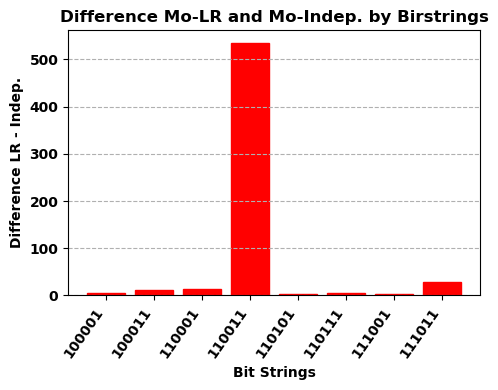

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assume counts_cc_grn_mo0 and counts_cc_grn_mo are defined dictionaries here.
# Assume bitstring_patterns is a defined list of patterns here.

differences_mo = {}

# Calculate the differences, handling cases where bitstrings are not common
all_bitstrings = set(counts_cc_grn_mo0.keys()) | set(counts_cc_grn_mo.keys())

for key in all_bitstrings:
    count_mo0 = counts_cc_grn_mo0.get(key, 0)
    count_mo = counts_cc_grn_mo.get(key, 0)
    differences_mo[key] = count_mo - count_mo0

# Define the pattern matching function (assuming it's the same as before)
def matches_pattern(bitstring, pattern):
    if len(bitstring) != len(pattern):
        return False
    for i in range(len(bitstring)):
        if pattern[i] != '.' and pattern[i] != bitstring[i]:
            return False
    return True

# Filter bitstrings based on the defined patterns first
pattern_filtered_bitstrings = []
pattern_filtered_differences = []

for bitstring, difference in differences_mo.items():
    for pattern in bitstring_patterns:
        if matches_pattern(bitstring, pattern):
            # Keep this bitstring and difference if it matches any pattern
            pattern_filtered_bitstrings.append(bitstring)
            pattern_filtered_differences.append(difference)
            break # Move to the next bitstring once a match is found

# --- Filter for positive or zero differences ONLY ---
# Create new lists containing only the elements where the difference is >= 0
filtered_bitstrings_mo = [] # Use these names for the final lists
filtered_differences_mo = []

# Iterate through the pattern-filtered data and keep only positive/zero differences
for bitstring, difference in zip(pattern_filtered_bitstrings, pattern_filtered_differences):
    if difference > 0: # Keep only positive or zero differences
        filtered_bitstrings_mo.append(bitstring)
        filtered_differences_mo.append(difference)

# --- End of filtering for positive differences ---


# Sort the filtered bitstrings for better visualization
# This sorting now applies only to the bitstrings with positive differences
sorted_indices = np.argsort(filtered_bitstrings_mo)
filtered_bitstrings_mo = [filtered_bitstrings_mo[i] for i in sorted_indices]
filtered_differences_mo = [filtered_differences_mo[i] for i in sorted_indices] # Apply same sorting to differences


# Create the bar plot with the positively filtered data
plt.figure(figsize=(5, 4))
bars = plt.bar(filtered_bitstrings_mo, filtered_differences_mo, edgecolor='black')

# Color the bars - since we only have >=0 differences, all will typically be colored the same
for bar, diff in zip(bars, filtered_differences_mo):
    # Note: with >=0 filtering, only diff > 0 or diff == 0 will be plotted
    if diff > 0:
        bar.set_color('red')  # Color for strictly positive differences
    else: # This handles diff == 0 cases
         bar.set_color('red') # You can choose a different color here if you want 0s distinct

plt.xlabel('Bit Strings')
# Assuming the ylabel describes the original difference calculation
plt.ylabel('Difference LR - Indep.')
plt.title('Difference Mo-LR and Mo-Indep. by Birstrings') # Updated title
plt.xticks(rotation=55, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.savefig('diff_hist_mo.svg', bbox_inches='tight')
plt.show()

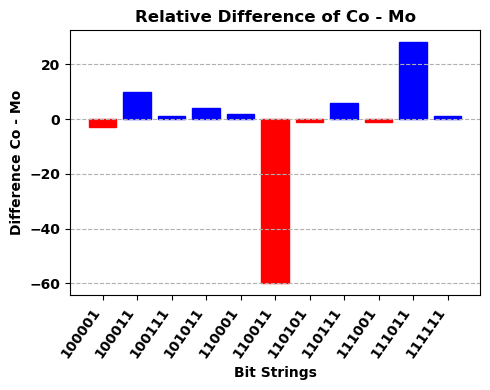

In [29]:
import matplotlib.pyplot as plt
import numpy as np


# We assume filtered_bitstrings_mo[i] corresponds to filtered_differences_mo[i], etc.
mo_data = dict(zip(filtered_bitstrings_mo, filtered_differences_mo))
co_data = dict(zip(filtered_bitstrings_co, filtered_differences_co))

all_bitstrings = set(mo_data.keys()) | set(co_data.keys())

# Initialize a dictionary to store the calculated differences
calculated_differences = {}

for bitstring in all_bitstrings:
    # Get the value for this bitstring from each dictionary
    # Use .get() with a default of 0 in case the bitstring is only in one list
    val_mo = mo_data.get(bitstring, 0)
    val_co = co_data.get(bitstring, 0)

    # Calculate the difference (co - mo)
    calculated_differences[bitstring] = val_co - val_mo

# 4. Prepare data for plotting (separate lists for bitstrings and differences)
plot_bitstrings = list(calculated_differences.keys())
plot_differences = list(calculated_differences.values())

# 5. Sort the data based on bitstring for better visualization (optional but recommended)
sorted_indices = np.argsort(plot_bitstrings)
plot_bitstrings = [plot_bitstrings[i] for i in sorted_indices]
plot_differences = [plot_differences[i] for i in sorted_indices]

# 6. Create the bar plot using the calculated differences
plt.figure(figsize=(5, 4))
bars = plt.bar(plot_bitstrings, plot_differences, edgecolor='black')

# 7. Color the bars based on the sign of the difference
for bar, diff in zip(bars, plot_differences):
    if diff > 0:
        bar.set_color('blue')  # Color for positive differences
    else:
        bar.set_color('red')   # Color for negative differences

plt.xlabel('Bit Strings')
plt.ylabel('Difference Co - Mo') # Updated label
plt.title('Relative Difference of Co - Mo')     # Updated title
plt.xticks(rotation=55, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid(axis='y', linestyle='--')
plt.savefig('diff_relative_co_mo.svg', bbox_inches='tight')
plt.show()


In [30]:
print(gl_recv[::-1], gl_source[::-1])
#print(gl_recv, gl_source)

['TGFB1', 'COL1A1', 'PDGFRB'] ['PDGFB', 'SMAD3', 'TGFBR2']


In [31]:
print( gl_source,  gl_recv)

['TGFBR2', 'SMAD3', 'PDGFB'] ['PDGFRB', 'COL1A1', 'TGFB1']


--- Concatenated DataFrame (bound_qc_co vs bound_qc_mo) ---
       Prob_0_co  Prob_1_co  Prob_0_mo  Prob_1_mo
Qubit                                            
0       0.914984   0.085016   0.913779   0.086221
1       0.040021   0.959979   0.068383   0.931617
2       0.961240   0.038760   0.970433   0.029567
3       0.983423   0.016577   0.982761   0.017239
4       0.028943   0.971057   0.032536   0.967464
5       0.942125   0.057875   0.939499   0.060501
------------------------------------------------------------
--- Concatenated DataFrame (bound_qc_co0 vs bound_qc_mo0) ---
       Prob_0_co0  Prob_1_co0  Prob_0_mo0  Prob_1_mo0
Qubit                                                
0        0.969741    0.030259    0.971499    0.028501
1        0.040021    0.959979    0.068383    0.931617
2        0.961240    0.038760    0.970433    0.029567
3        0.983423    0.016577    0.982761    0.017239
4        0.028943    0.971057    0.032536    0.967464
5        0.942125    0.057875    0.9394

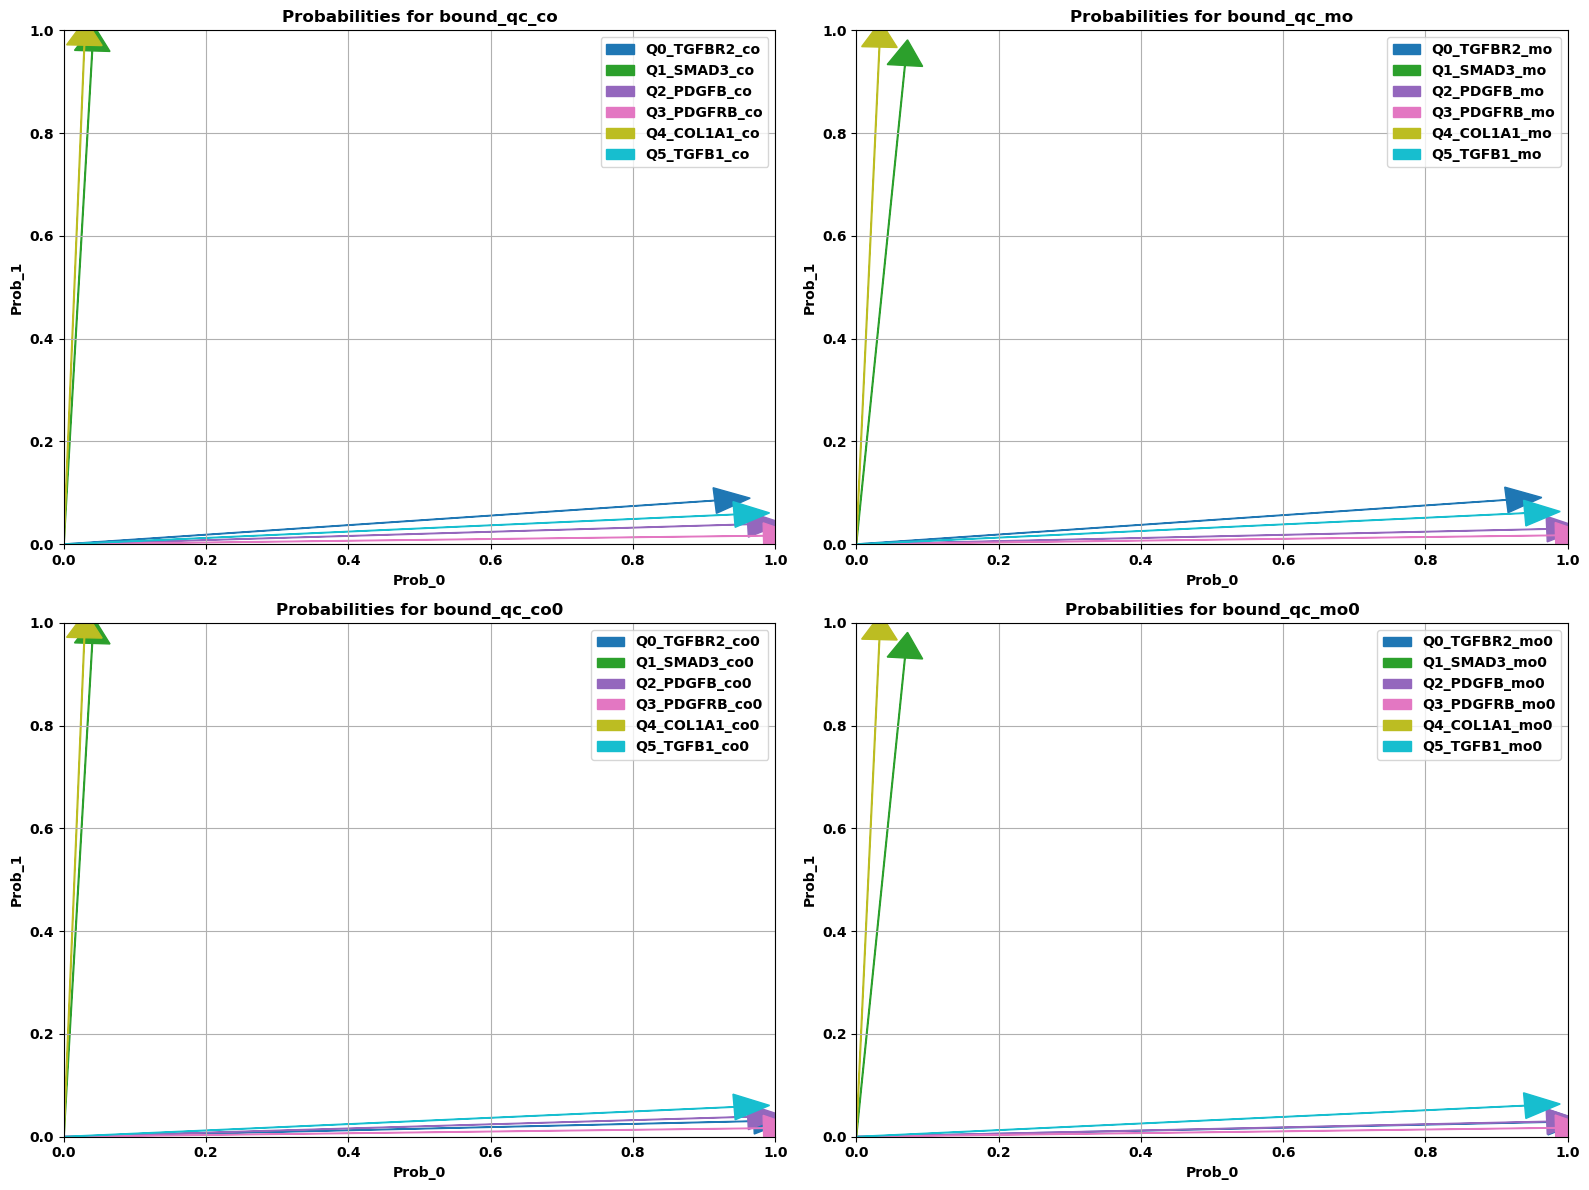

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrames
from qiskit.exceptions import QiskitError
from qiskit.quantum_info import DensityMatrix, Statevector, partial_trace

# Assuming the following variables are defined elsewhere:
# cc_grn_circuit_co, cc_grn_circuit_mo, cc_grn_circuit_co0, cc_grn_circuit_mo0
# all_params_lr_co, all_params_lr_mo, all_params_lr_co0, all_params_lr_mo0
# gl_source, gl_recv

# --- Data Calculation for bound_qc_co and bound_qc_mo ---
bound_qc_co_circ = cc_grn_circuit_co.copy()
bound_qc_co_circ.assign_parameters(optimized_full_params_lr_co, inplace=True)

bound_qc_mo_circ = cc_grn_circuit_mo.copy()
bound_qc_mo_circ.assign_parameters(optimized_full_params_lr_mo, inplace=True)

# Assume number of qubits is the same across all circuits
n_qubits = DensityMatrix(bound_qc_co_circ).num_qubits


co_data_bound = []
density_matrix_co_bound = DensityMatrix(bound_qc_co_circ)
for qubit_to_keep in range(n_qubits):
    trace_out_qubits = list(range(n_qubits))
    trace_out_qubits.pop(qubit_to_keep)
    reduced_density_matrix_data = partial_trace(density_matrix_co_bound, trace_out_qubits).data
    prob_0 = np.real(reduced_density_matrix_data[0, 0])
    prob_1 = np.real(reduced_density_matrix_data[1, 1])
    co_data_bound.append([qubit_to_keep, prob_0, prob_1])

mo_data_bound = []
density_matrix_mo_bound = DensityMatrix(bound_qc_mo_circ)
for qubit_to_keep in range(n_qubits):
    trace_out_qubits = list(range(n_qubits))
    trace_out_qubits.pop(qubit_to_keep)
    reduced_density_matrix_data = partial_trace(density_matrix_mo_bound, trace_out_qubits).data
    prob_0 = np.real(reduced_density_matrix_data[0, 0])
    prob_1 = np.real(reduced_density_matrix_data[1, 1])
    mo_data_bound.append([qubit_to_keep, prob_0, prob_1])

# Create DataFrames for bound data (add suffixes to column names)
co_df_bound = pd.DataFrame(co_data_bound, columns=['Qubit', 'Prob_0_co', 'Prob_1_co'])
mo_df_bound = pd.DataFrame(mo_data_bound, columns=['Qubit', 'Prob_0_mo', 'Prob_1_mo'])

# Concatenate DataFrames for bound data and print
concatenated_df_bound = pd.concat([co_df_bound.set_index('Qubit'), mo_df_bound.set_index('Qubit')], axis=1)
print("--- Concatenated DataFrame (bound_qc_co vs bound_qc_mo) ---")
print(concatenated_df_bound)
print("-" * 60) # Separator


# --- Data Calculation for bound_qc_co0 and bound_qc_mo0 ---
bound_qc_co0_circ = cc_grn_circuit_co0.copy()
bound_qc_co0_circ.assign_parameters(optimized_full_params_lr_co0, inplace=True)

bound_qc_mo0_circ = cc_grn_circuit_mo0.copy()
bound_qc_mo0_circ.assign_parameters(optimized_full_params_lr_mo0, inplace=True)

co_data_bound0 = []
density_matrix_co_bound0 = DensityMatrix(bound_qc_co0_circ)
for qubit_to_keep in range(n_qubits):
    trace_out_qubits = list(range(n_qubits))
    trace_out_qubits.pop(qubit_to_keep)
    reduced_density_matrix_data = partial_trace(density_matrix_co_bound0, trace_out_qubits).data
    prob_0 = np.real(reduced_density_matrix_data[0, 0])
    prob_1 = np.real(reduced_density_matrix_data[1, 1])
    co_data_bound0.append([qubit_to_keep, prob_0, prob_1])

mo_data_bound0 = []
density_matrix_mo_bound0 = DensityMatrix(bound_qc_mo0_circ)
for qubit_to_keep in range(n_qubits):
    trace_out_qubits = list(range(n_qubits))
    trace_out_qubits.pop(qubit_to_keep)
    reduced_density_matrix_data = partial_trace(density_matrix_mo_bound0, trace_out_qubits).data
    prob_0 = np.real(reduced_density_matrix_data[0, 0])
    prob_1 = np.real(reduced_density_matrix_data[1, 1])
    mo_data_bound0.append([qubit_to_keep, prob_0, prob_1])

# Create DataFrames for bound0 data (add suffixes to column names)
co_df_bound0 = pd.DataFrame(co_data_bound0, columns=['Qubit', 'Prob_0_co0', 'Prob_1_co0'])
mo_df_bound0 = pd.DataFrame(mo_data_bound0, columns=['Qubit', 'Prob_0_mo0', 'Prob_1_mo0'])

# Concatenate DataFrames for bound0 data and print
concatenated_df_bound0 = pd.concat([co_df_bound0.set_index('Qubit'), mo_df_bound0.set_index('Qubit')], axis=1)
print("--- Concatenated DataFrame (bound_qc_co0 vs bound_qc_mo0) ---")
print(concatenated_df_bound0)
print("-" * 60) # Separator


# --- Plotting in a single 2x2 panel ---

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Adjust figsize as needed

# Define colors for each qubit using tab20 or tab10 (consistent coloring across plots)
if n_qubits <= 10:
    colors = plt.cm.tab10(np.linspace(0, 1, n_qubits))
else:
    colors = plt.cm.tab20(np.linspace(0, 1, n_qubits))

# Concatenate genes (assuming gl_source and gl_recv are lists of gene names corresponding to qubits)
genes = gl_source + gl_recv

# --- Plotting on each subplot ---

# Plot for bound_qc_co (Top-Left Subplot)
ax1 = axes[0, 0]
for index, row in co_df_bound.iterrows(): # Use co_df_bound here
    ax1.arrow(0, 0, row['Prob_0_co'], row['Prob_1_co'], # Use correct column names
              head_width=0.05, head_length=0.05, fc=colors[index], ec=colors[index],
              label=f"Q{int(row['Qubit'])}_{genes[index]}_co")

ax1.set_xlabel('Prob_0')
ax1.set_ylabel('Prob_1')
ax1.set_title('Probabilities for bound_qc_co')
ax1.grid(True)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.legend()


# Plot for bound_qc_mo (Top-Right Subplot)
ax2 = axes[0, 1]
for index, row in mo_df_bound.iterrows(): # Use mo_df_bound here
    ax2.arrow(0, 0, row['Prob_0_mo'], row['Prob_1_mo'], # Use correct column names
              head_width=0.05, head_length=0.05, fc=colors[index], ec=colors[index],
              label=f"Q{int(row['Qubit'])}_{genes[index]}_mo")

ax2.set_xlabel('Prob_0')
ax2.set_ylabel('Prob_1')
ax2.set_title('Probabilities for bound_qc_mo')
ax2.grid(True)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.legend()


# Plot for bound_qc_co0 (Bottom-Left Subplot)
ax3 = axes[1, 0]
for index, row in co_df_bound0.iterrows(): # Use co_df_bound0 here
    ax3.arrow(0, 0, row['Prob_0_co0'], row['Prob_1_co0'], # Use correct column names
              head_width=0.05, head_length=0.05, fc=colors[index], ec=colors[index],
              label=f"Q{int(row['Qubit'])}_{genes[index]}_co0")

ax3.set_xlabel('Prob_0')
ax3.set_ylabel('Prob_1')
ax3.set_title('Probabilities for bound_qc_co0')
ax3.grid(True)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.legend()


# Plot for bound_qc_mo0 (Bottom-Right Subplot)
ax4 = axes[1, 1]
for index, row in mo_df_bound0.iterrows(): # Use mo_df_bound0 here
    ax4.arrow(0, 0, row['Prob_0_mo0'], row['Prob_1_mo0'], # Use correct column names
              head_width=0.05, head_length=0.05, fc=colors[index], ec=colors[index],
              label=f"Q{int(row['Qubit'])}_{genes[index]}_mo0")

ax4.set_xlabel('Prob_0')
ax4.set_ylabel('Prob_1')
ax4.set_title('Probabilities for bound_qc_mo0')
ax4.grid(True)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.legend()


# Adjust layout and display the plot
plt.tight_layout()
plt.show()